In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction

# Extract

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv', encoding='utf-8')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Transform

## Excluindo colunas redundantes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.drop(columns = ['Over18', 'EmployeeCount', 'DailyRate', 'HourlyRate', 'StandardHours', 'MonthlyRate'], inplace = True)

## Renomenando colunas e traduzindo categorias

In [5]:
df = df.rename(columns={'Age' : 'Idade',
                        'Attrition' : 'Atrito', 
                        'BusinessTravel' : 'Viagem_negócios',
                        'Department' : 'Departamento',
                        'DistanceFromHome' : 'Distância_casa',
                        'Education' : 'Educação',
                        'EducationField' : 'Campo_educação',
                        'EmployeeNumber' : 'ID_funcionário',
                        'EnvironmentSatisfaction' : 'Stisfação_ambiente', 
                        'Gender' : 'Genero', 
                        'JobInvolvement' : 'Envolvimento_trabalho', 
                        'JobLevel' : 'Nível_trabalho',
                        'JobRole' : 'Função',
                        'JobSatisfaction' : 'Satisfação_trabalho',
                        'MaritalStatus' : 'Status_civil',
                        'MonthlyIncome' : 'Salário',
                        'NumCompaniesWorked' : 'Qtd_empresas_trabalhadas',
                        'OverTime' : 'Hora_extra',
                        'PercentSalaryHike' : 'Porcentacem_aumento_salário',
                        'PerformanceRating' : 'Desempenho',
                        'RelationshipSatisfaction' : 'Satisfação_relação',
                        'StockOptionLevel' : 'Qtd_opções_ações',
                        'TotalWorkingYears' : 'Anos_trabalhando',
                        'TrainingTimesLastYear' : 'Qtd_treinamentos',
                        'WorkLifeBalance' : 'Equilibro_trabalho_pessoal',
                        'YearsAtCompany' : 'Anos_companhia',
                        'YearsInCurrentRole' : 'Anos_mesmo_cargo',
                        'YearsSinceLastPromotion' : 'Anos_pós_promoção',
                        'YearsWithCurrManager' : 'Anos_mesmo_gestor'})

In [6]:
df['Atrito'] = df['Atrito'].replace({'Yes':'Sim', 
                                     'No':'Não'})

df['Viagem_negócios'] = df['Viagem_negócios'].replace({'Travel_Rarely':'Raramente', 
                                                       'Travel_Frequently':'Frequentemente',
                                                       'Non-Travel':'Não'})

df['Departamento'] = df['Departamento'].replace({'Sales':'Vendas', 
                                                 'Research & Development':'Pesquisa & Desenvolvimento',
                                                 'Human Resources':'Recursos humanos'})

df['Campo_educação'] = df['Campo_educação'].replace({'Life Sciences':'Ciências da vida',
                                                     'Medical':'Medicina', 
                                                     'Technical Degree':'Curso técnico', 
                                                     'Human Resources':'Recursos humanos',
                                                     'Other':'Outro'})

df['Genero'] = df['Genero'].replace({'Female':'F', 
                                     'Male':'M'})

df['Função'] = df['Função'].replace({'Sales Executive':'Executivo de vendas',
                                     'Research Scientist':'Pesquisador', 
                                     'Laboratory Technician':'Técnico de laboratório', 
                                     'Manufacturing Director':'Diretor de manufatura', 
                                     'Healthcare Representative':'Representante de saúde', 
                                     'Manager':'Gerente', 
                                     'Sales Representative':'Representante de vendas', 
                                     'Research Director':'Diretor de pesquisa', 
                                     'Human Resources':'Recursos humanos'})

df['Status_civil'] = df['Status_civil'].replace({'Single':'Solteiro',
                                                 'Married':'Casado',
                                                 'Divorced':'Divorciado'})

df['Hora_extra'] = df['Hora_extra'].replace({'Yes':'Sim', 
                                             'No':'Não'})

## Análisando colunas

In [7]:
col_obj = [col for col in df.columns if df[col].dtypes == 'object']
col_num = [col for col in df.columns if df[col].dtypes == 'int64']

## Avaliando dados categóricos

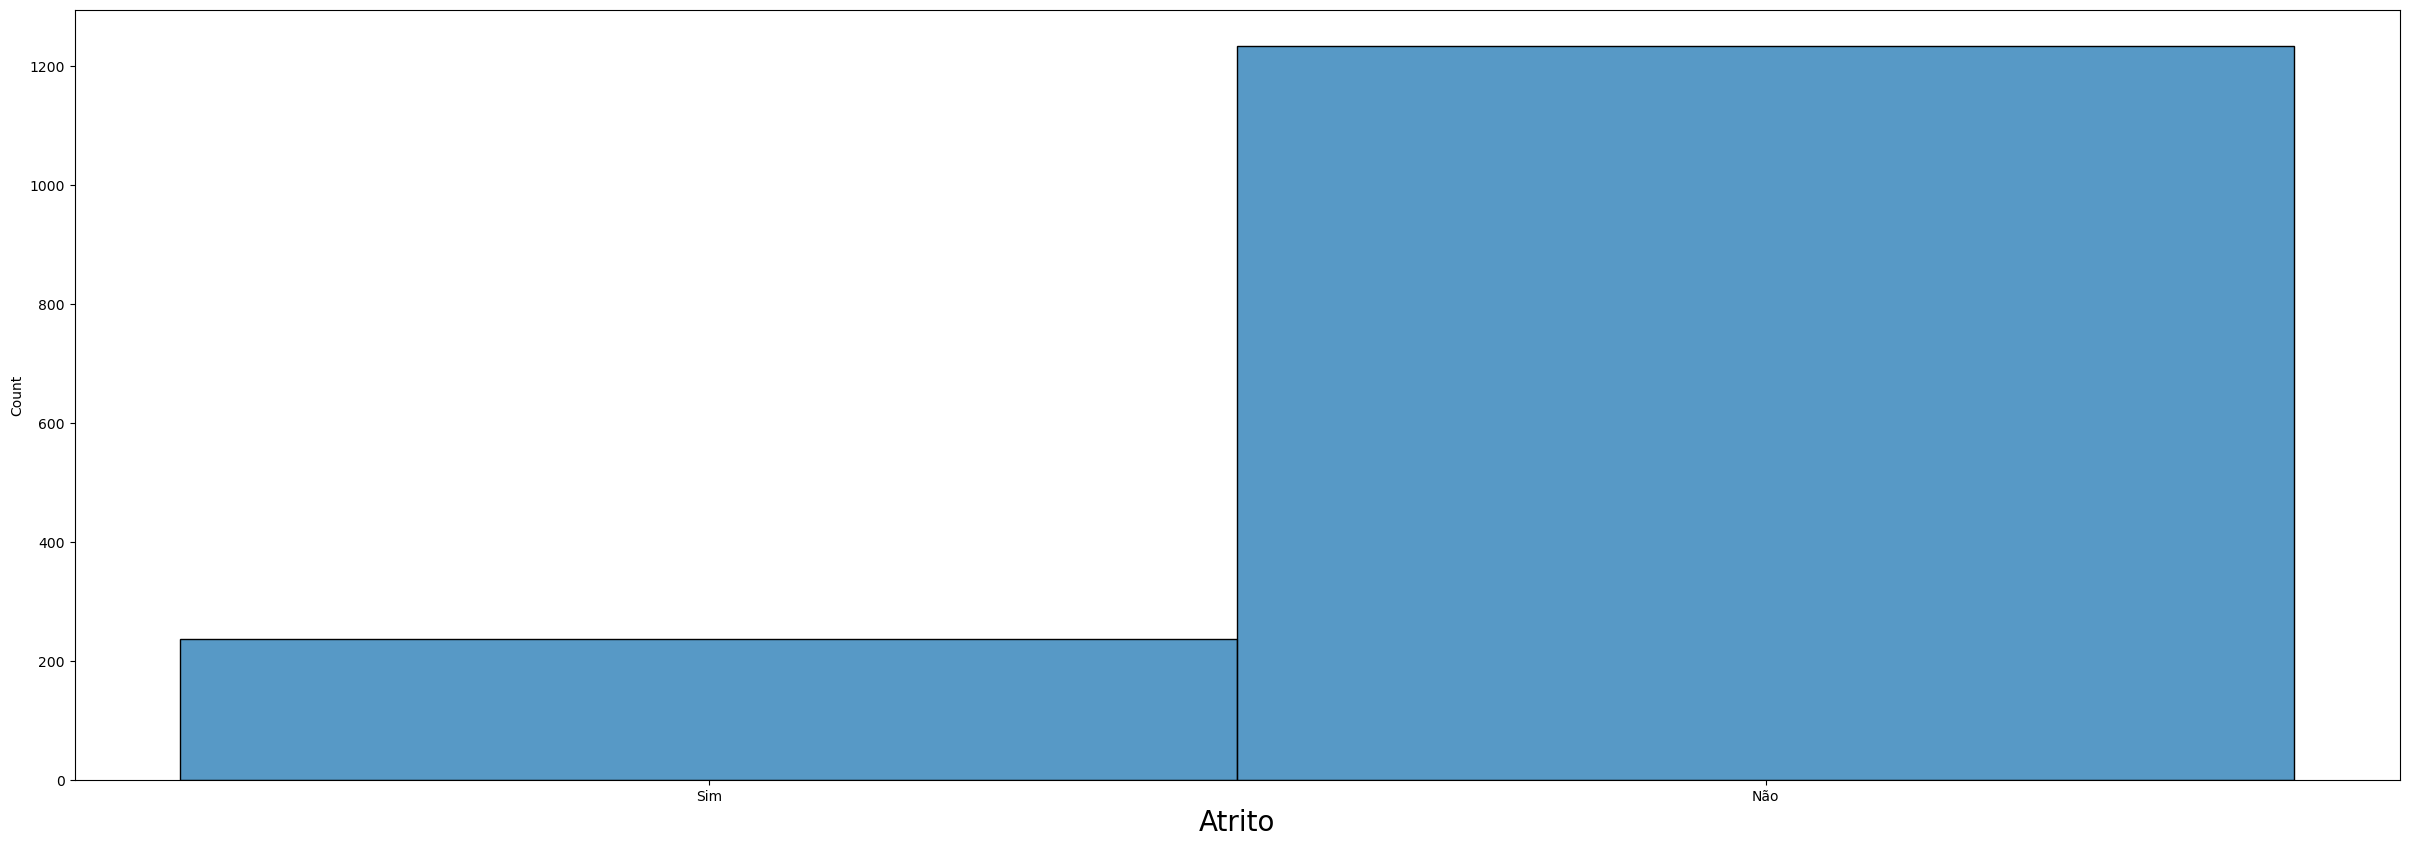

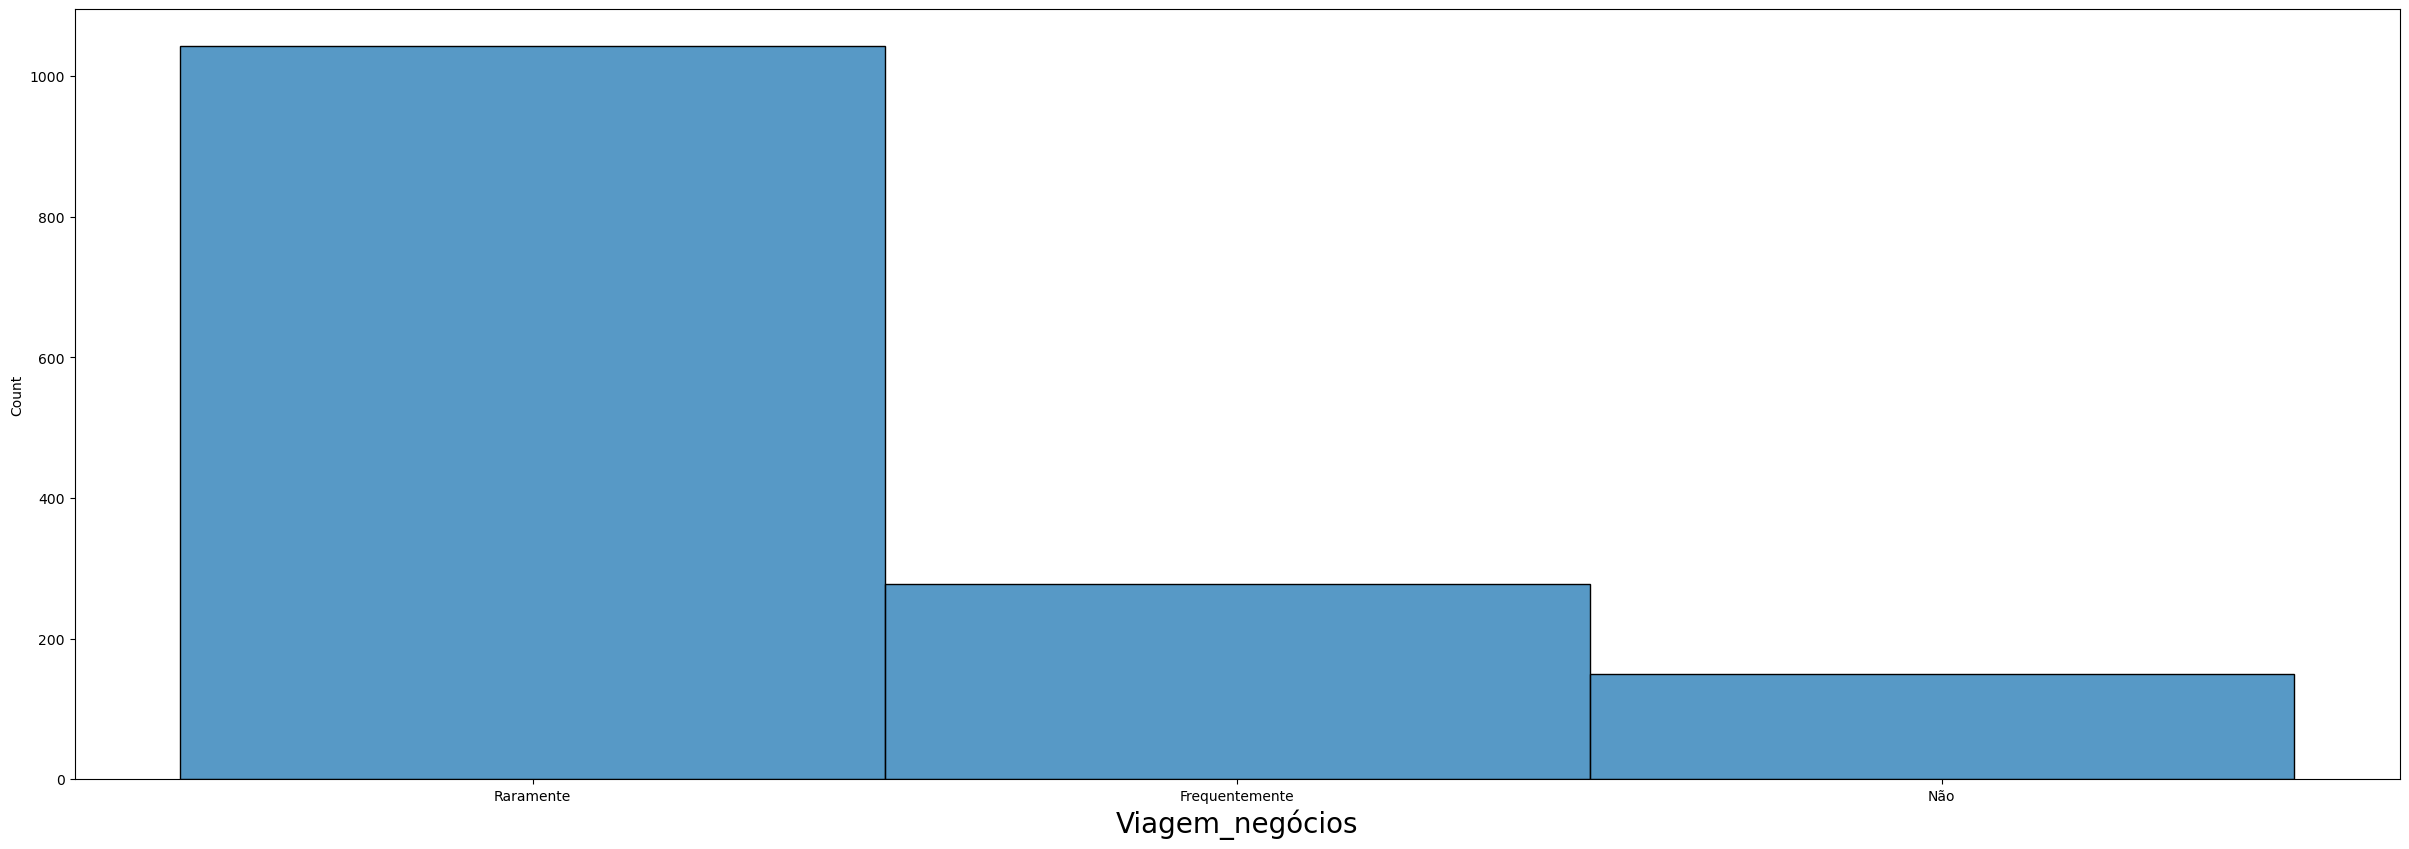

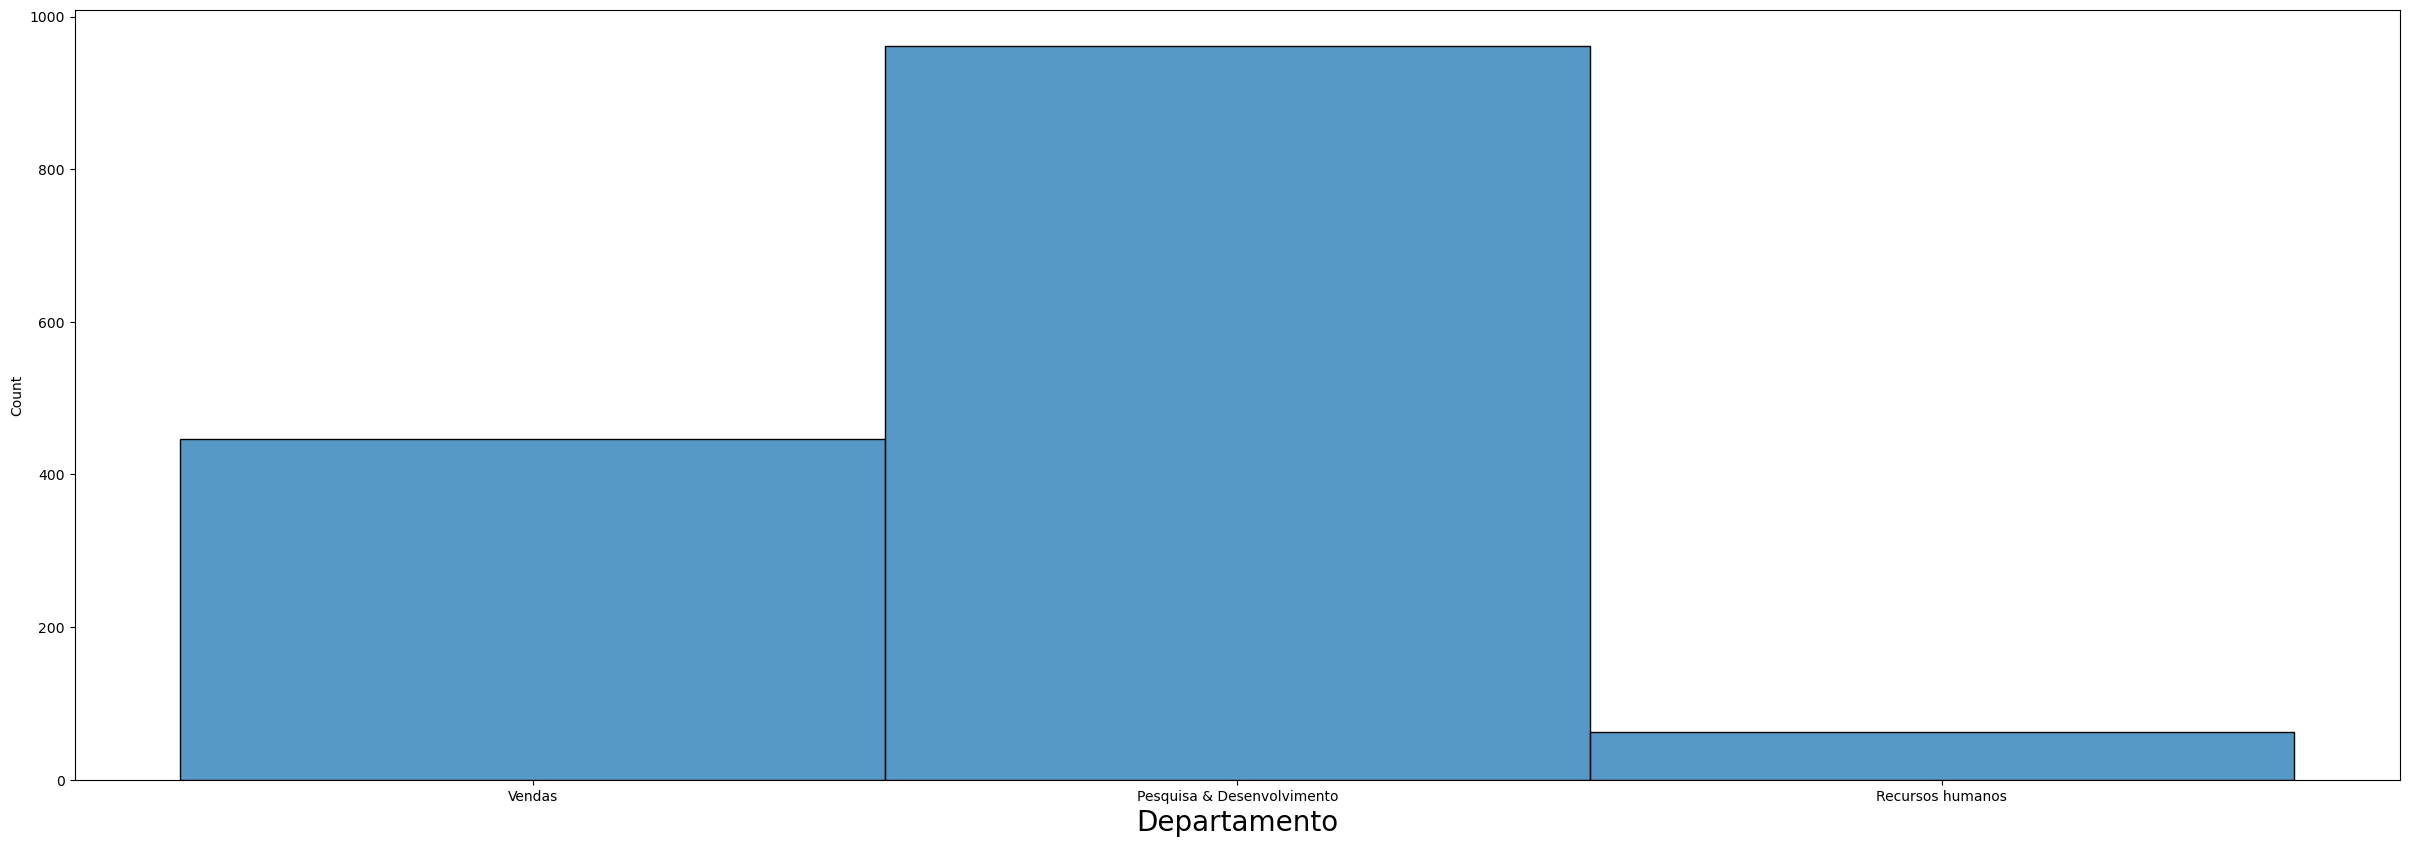

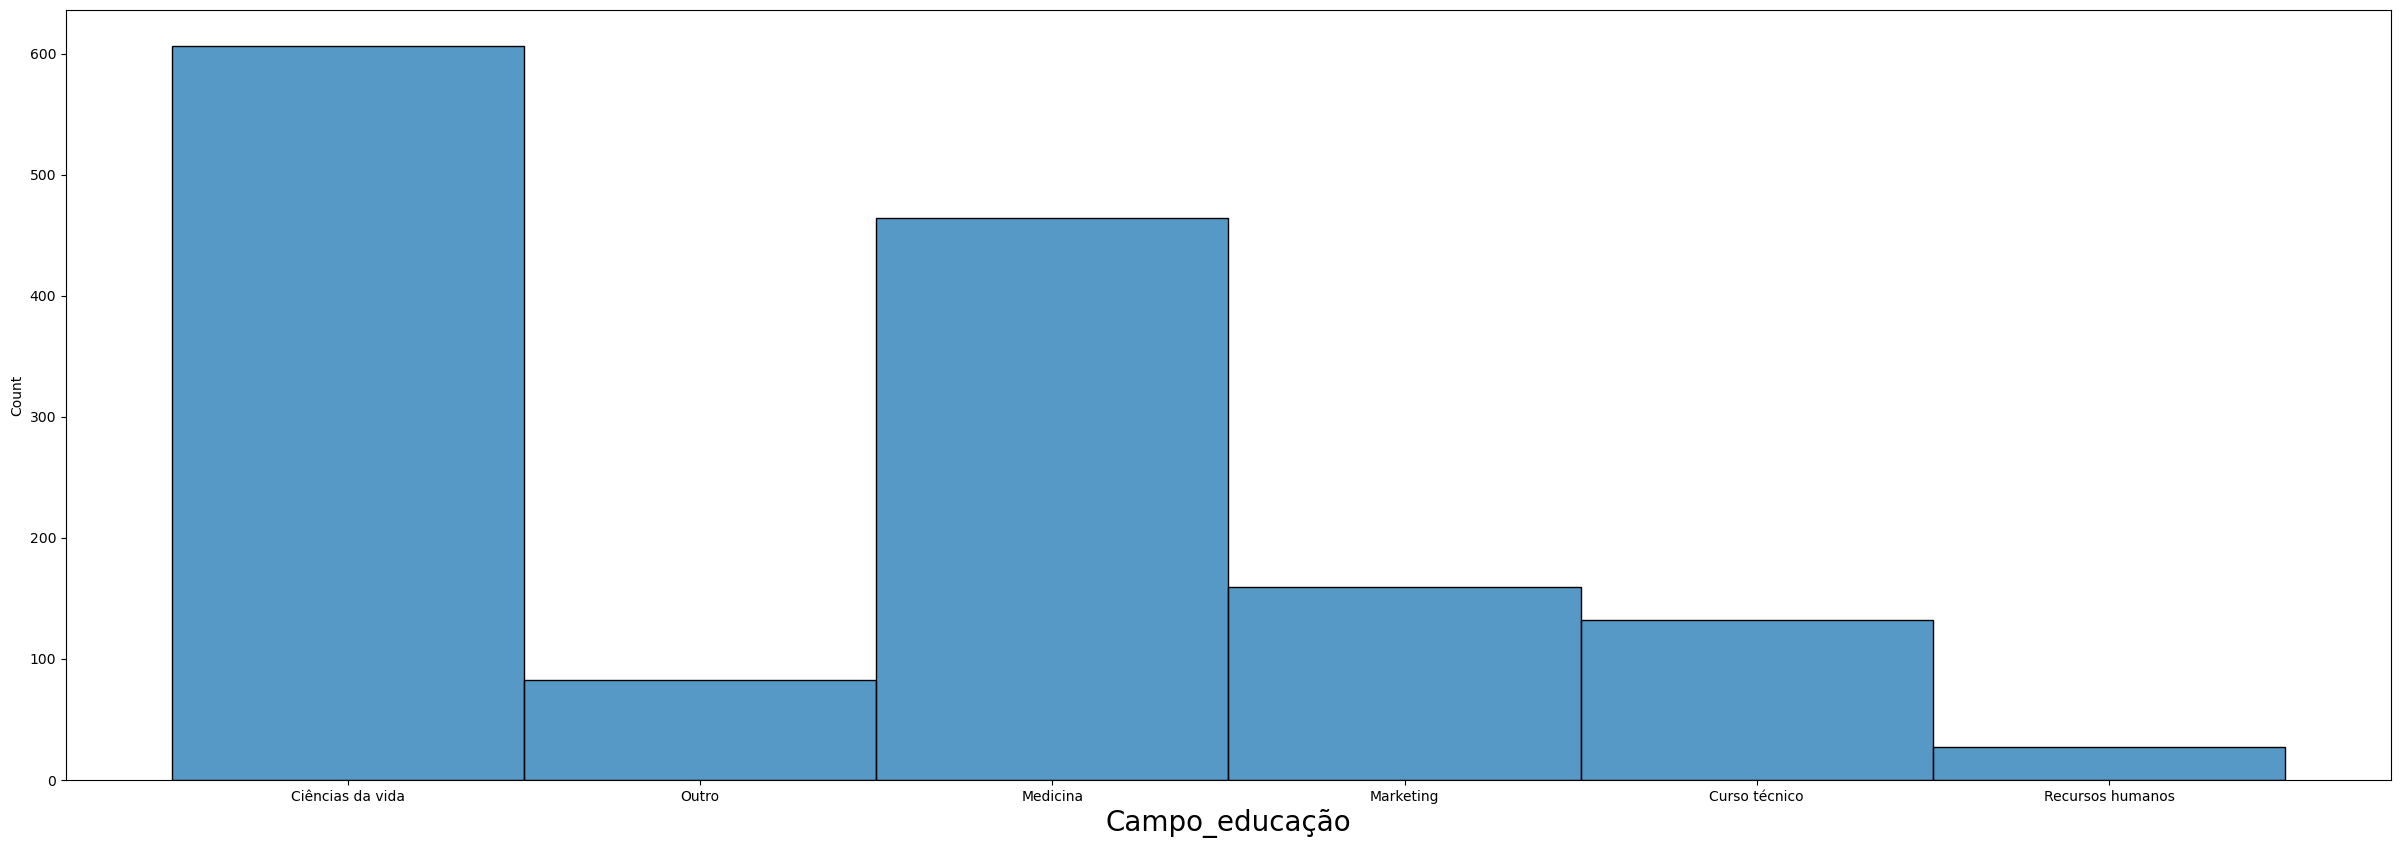

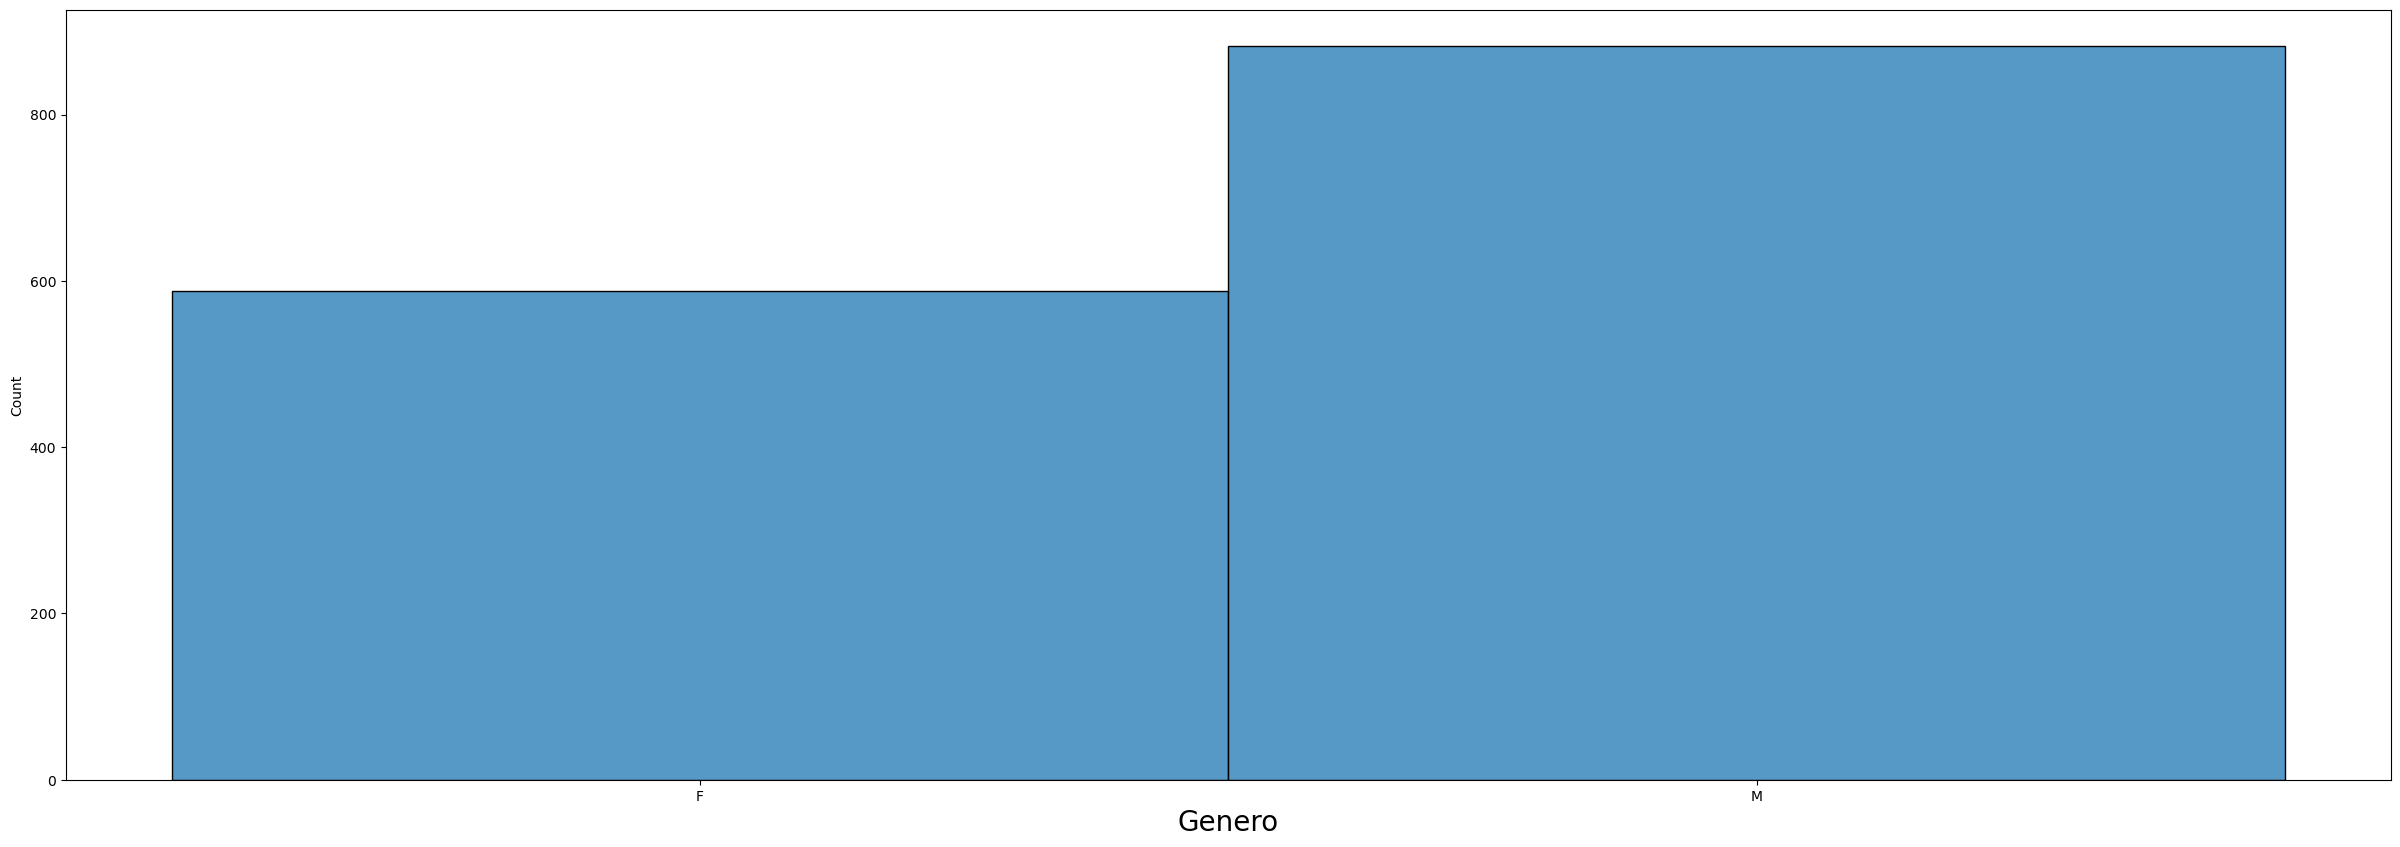

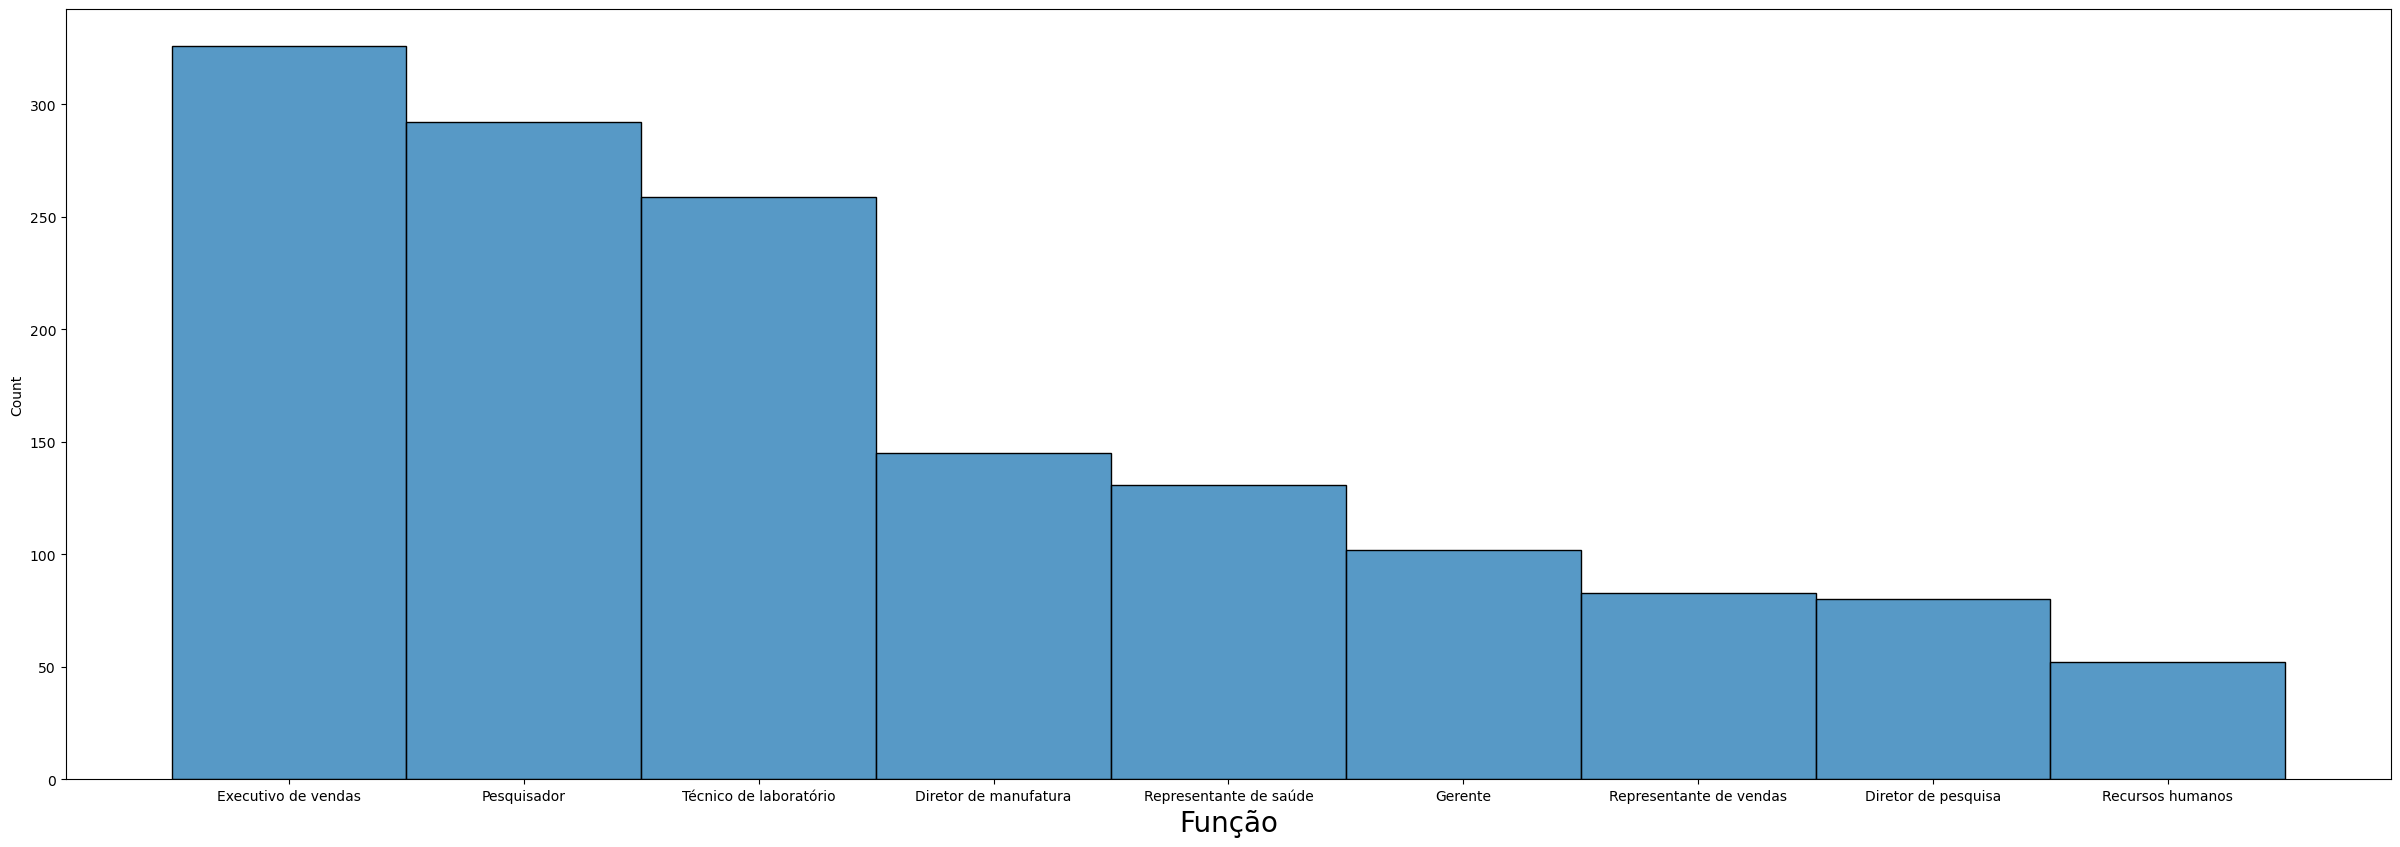

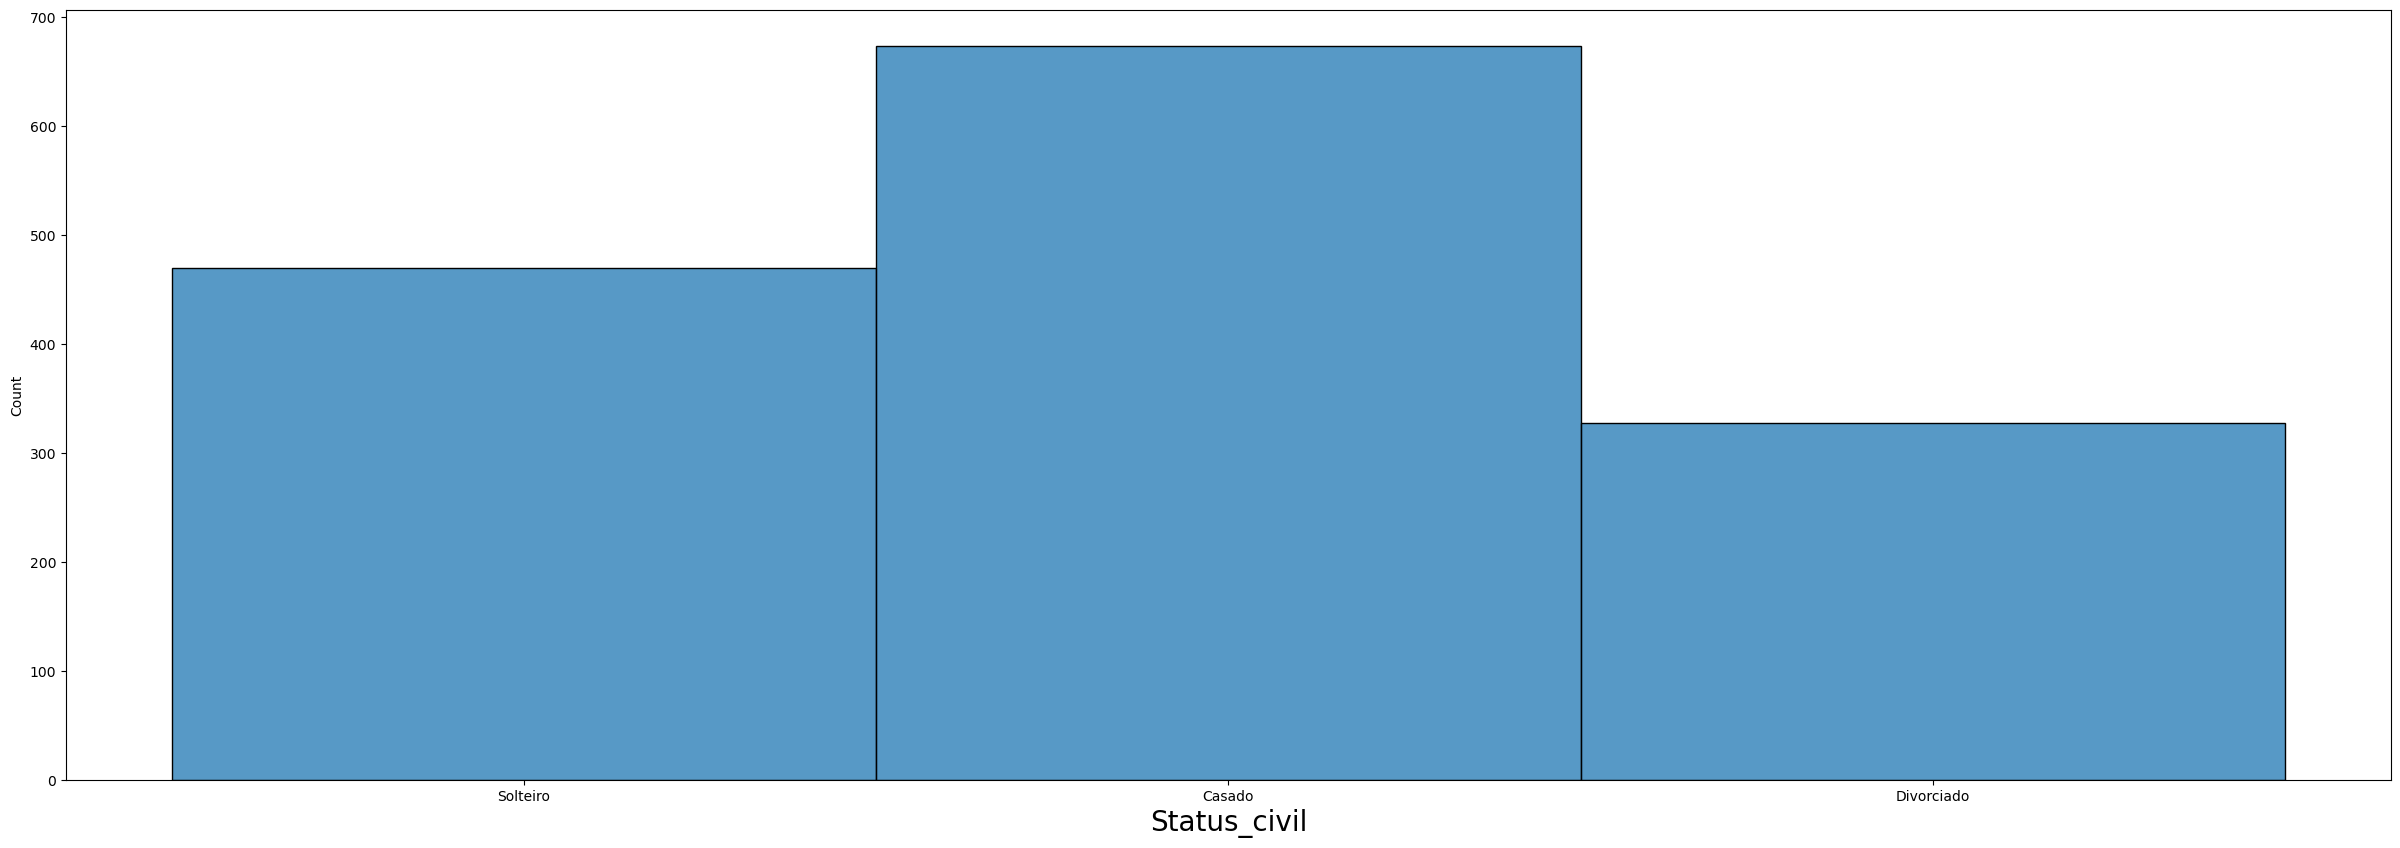

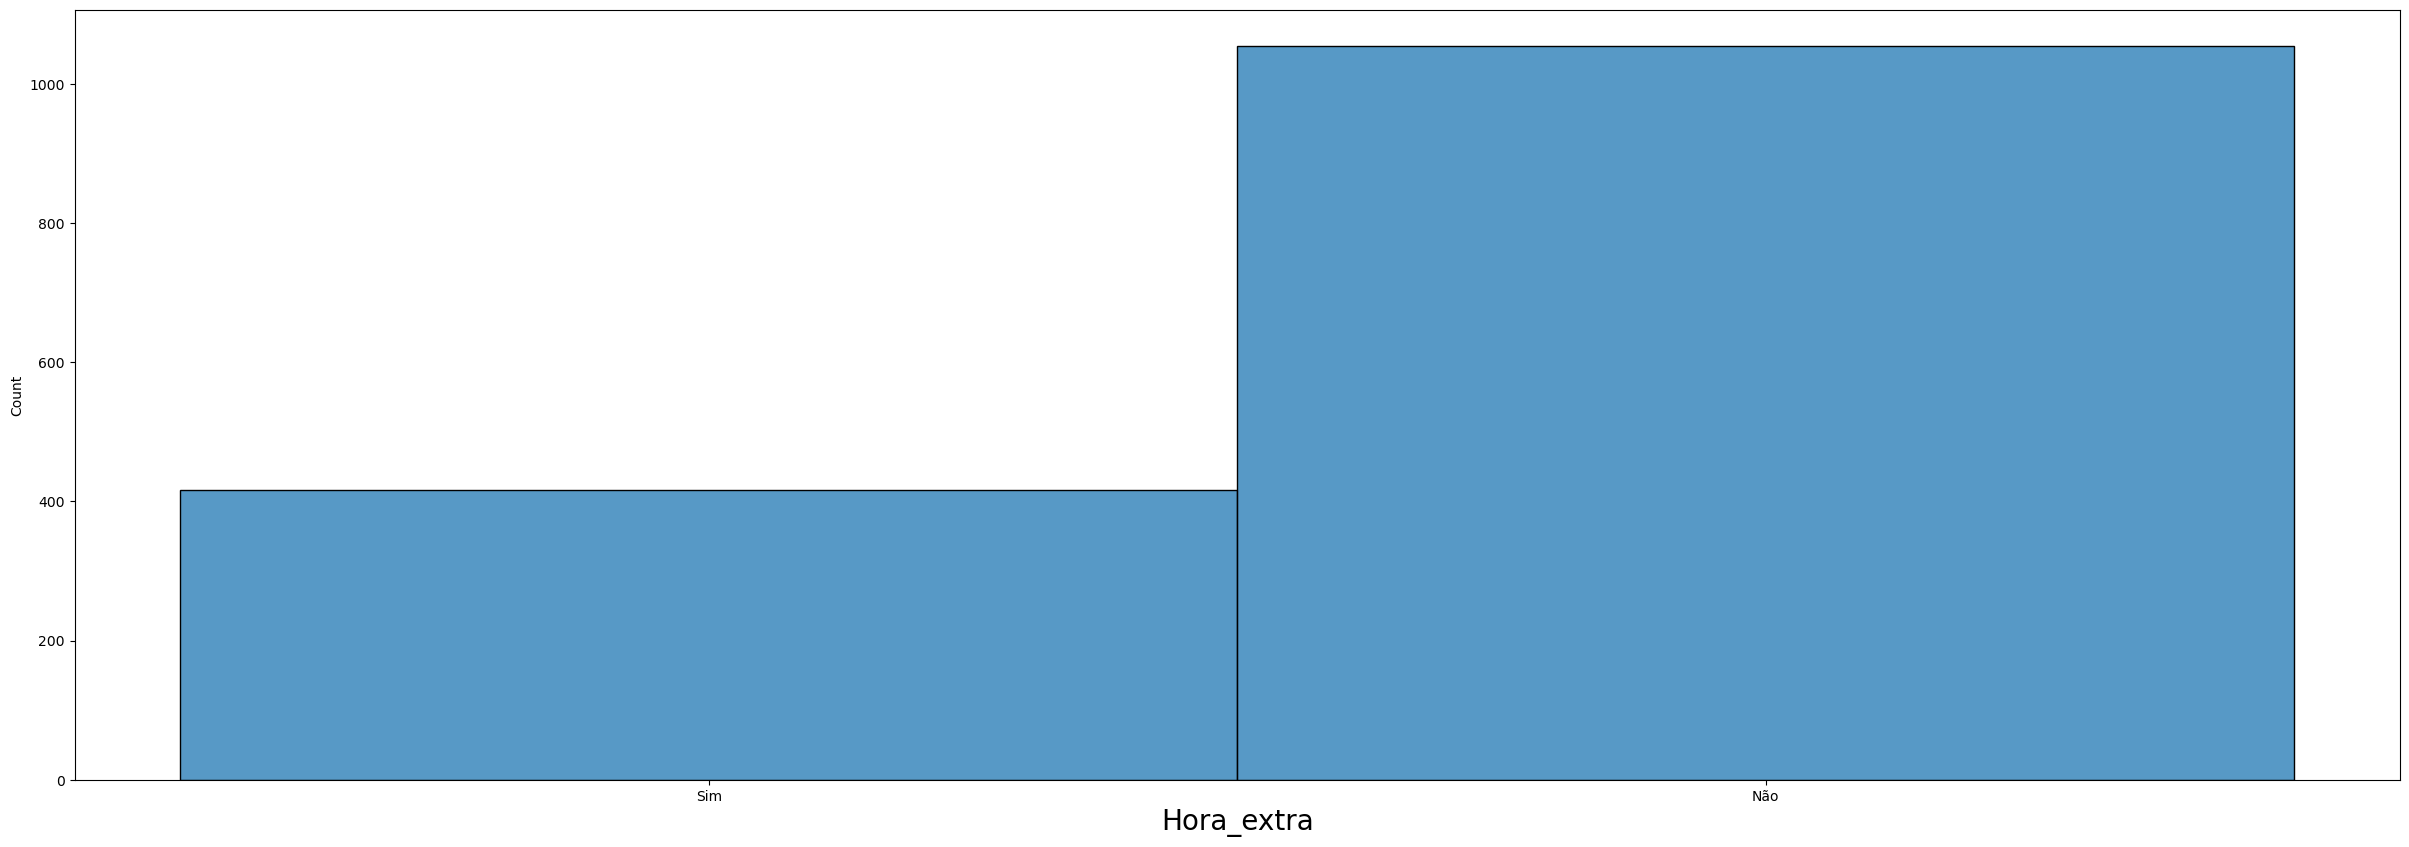

In [8]:
for i in col_obj:
    plt.figure(figsize=(30,10))
    plt.xlabel(i, fontsize = 20)
    sns.histplot(data=df, x=i), '\n'

## Avaliando dados numéricos

C:\Users\marco\AppData\Local\Temp\ipykernel_28648\714322791.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30,10))


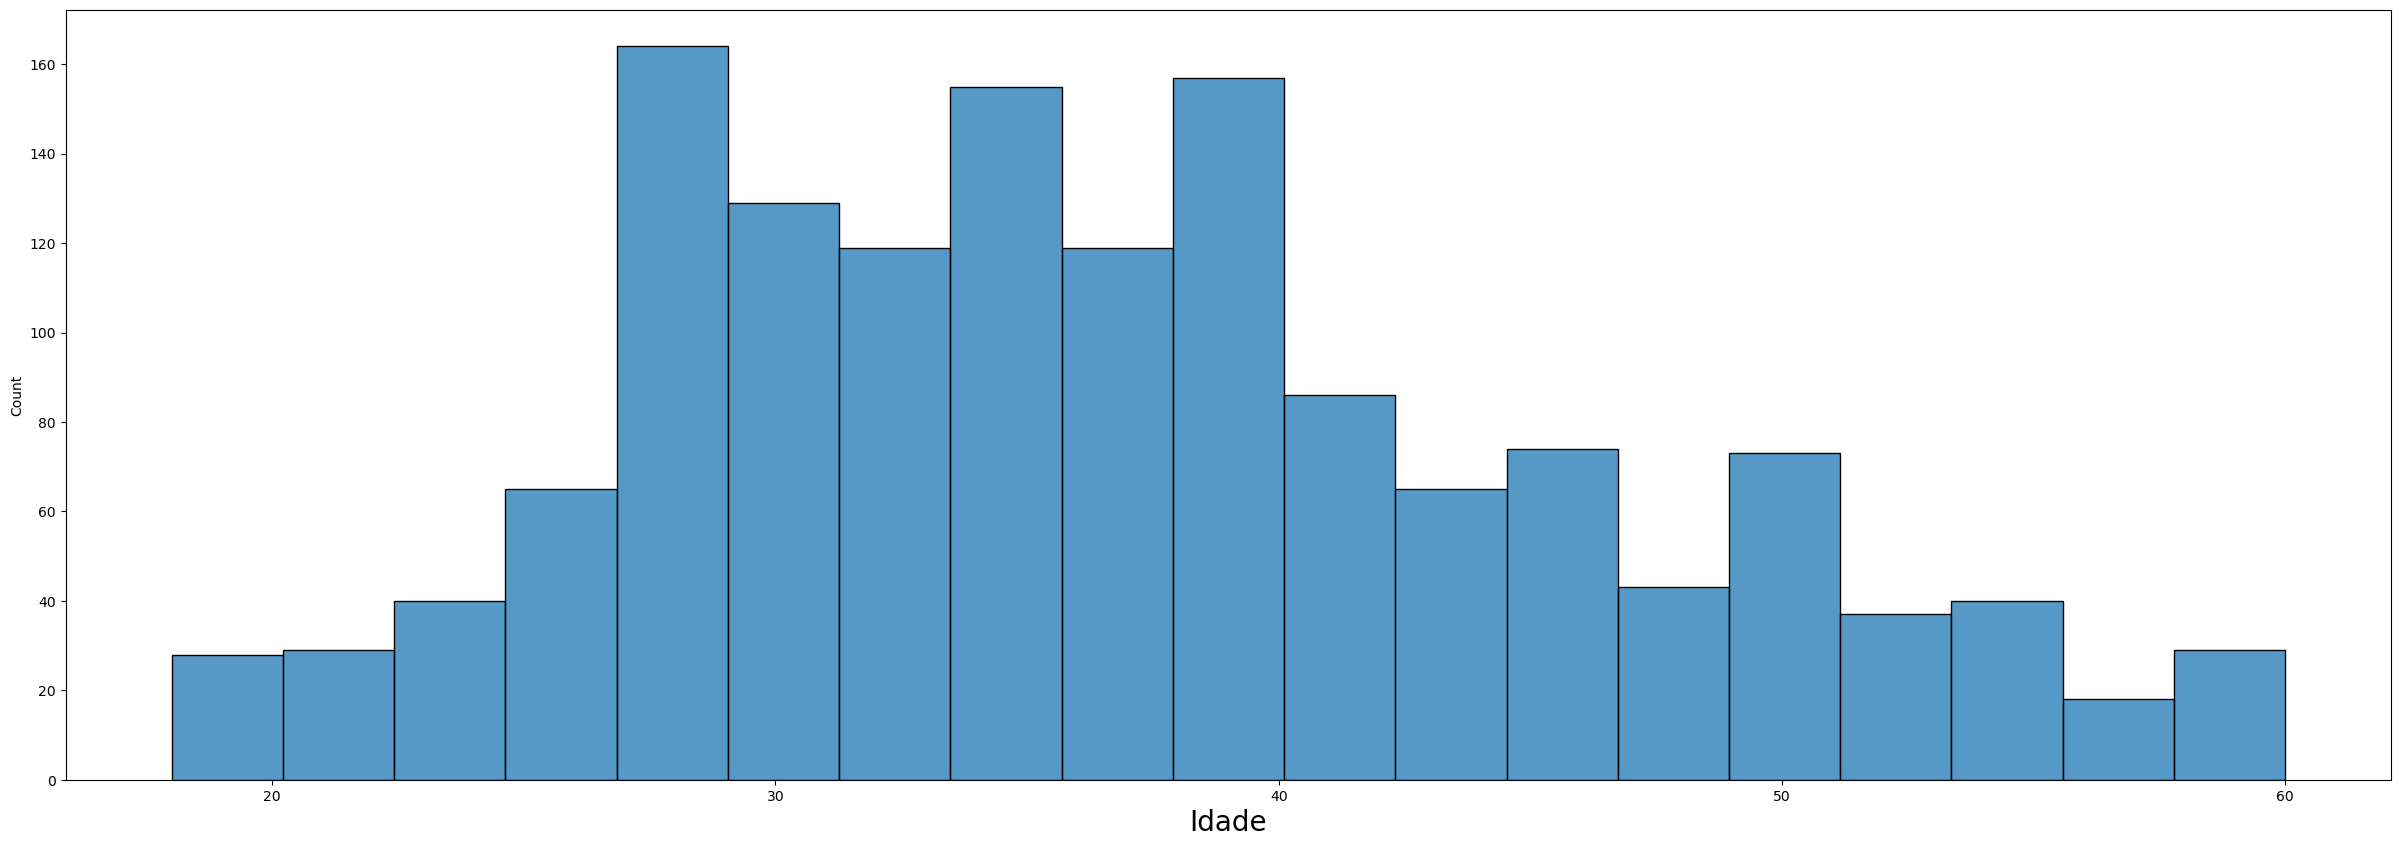

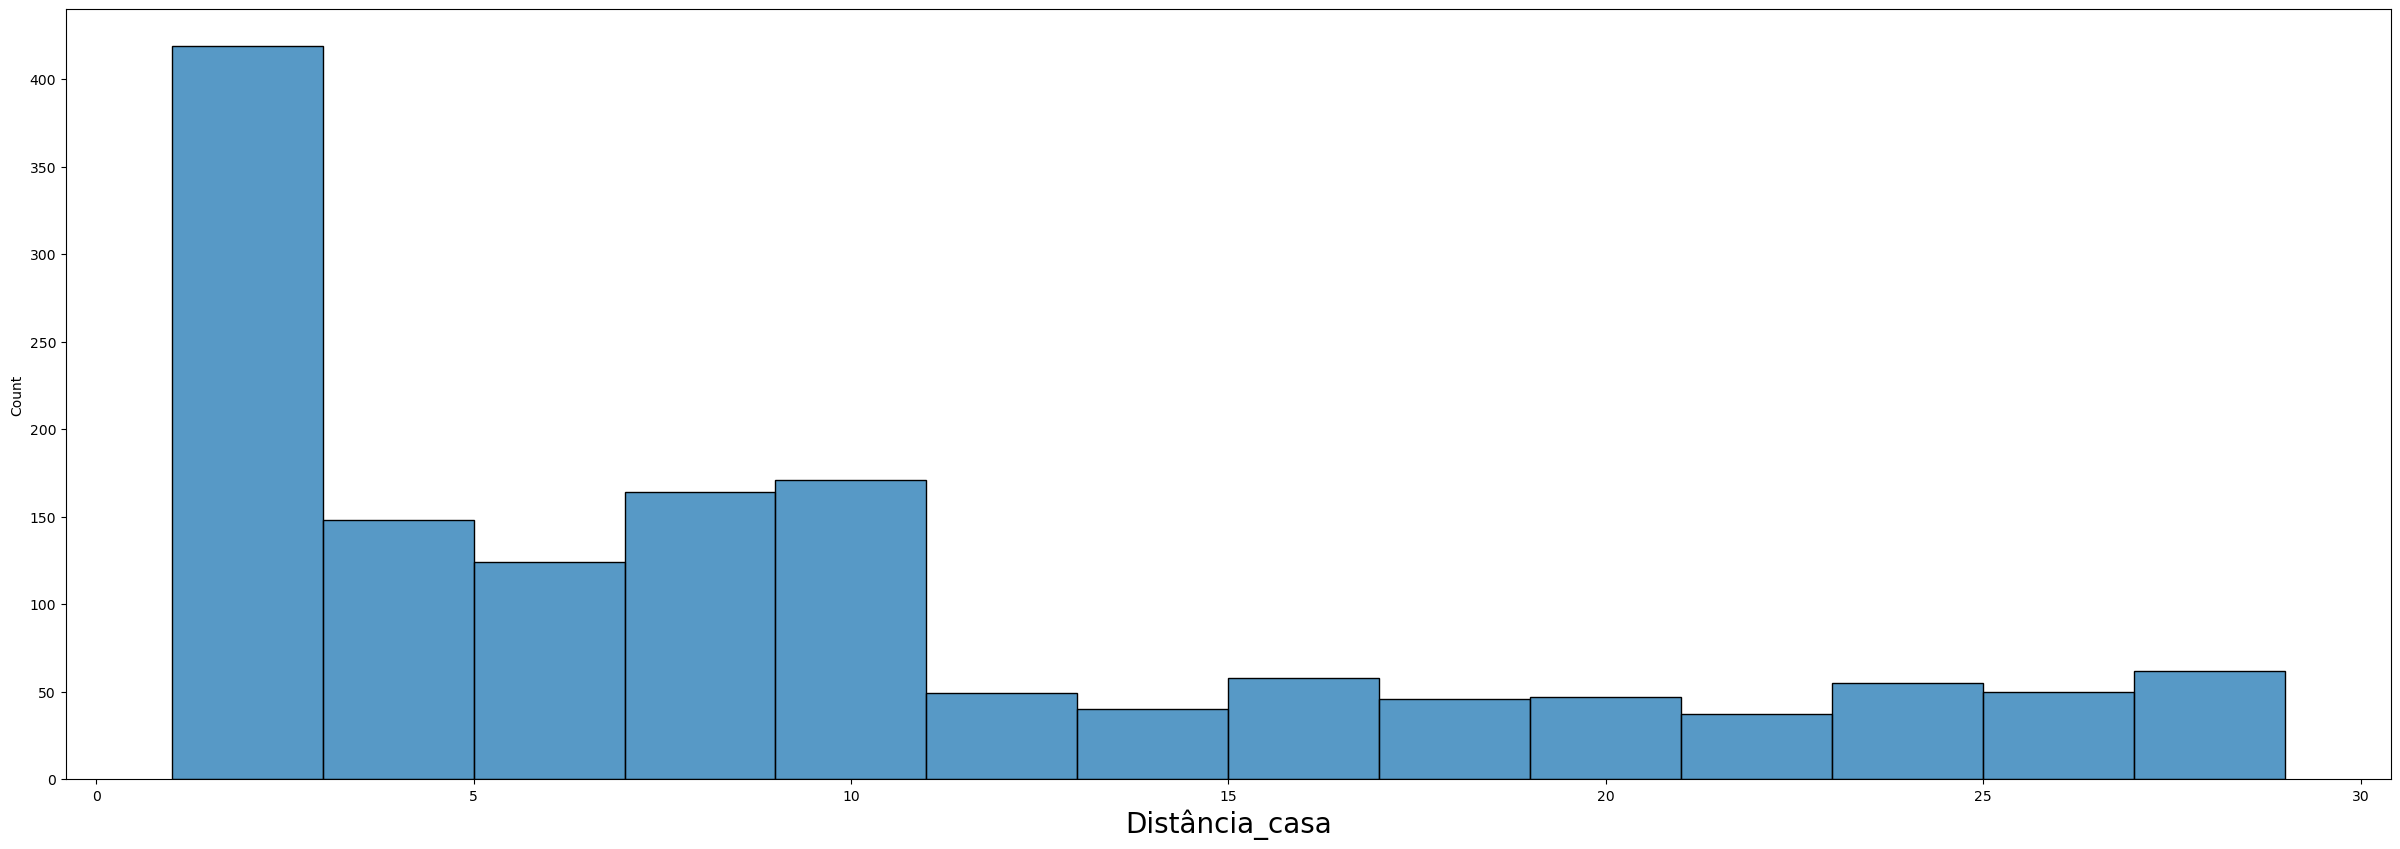

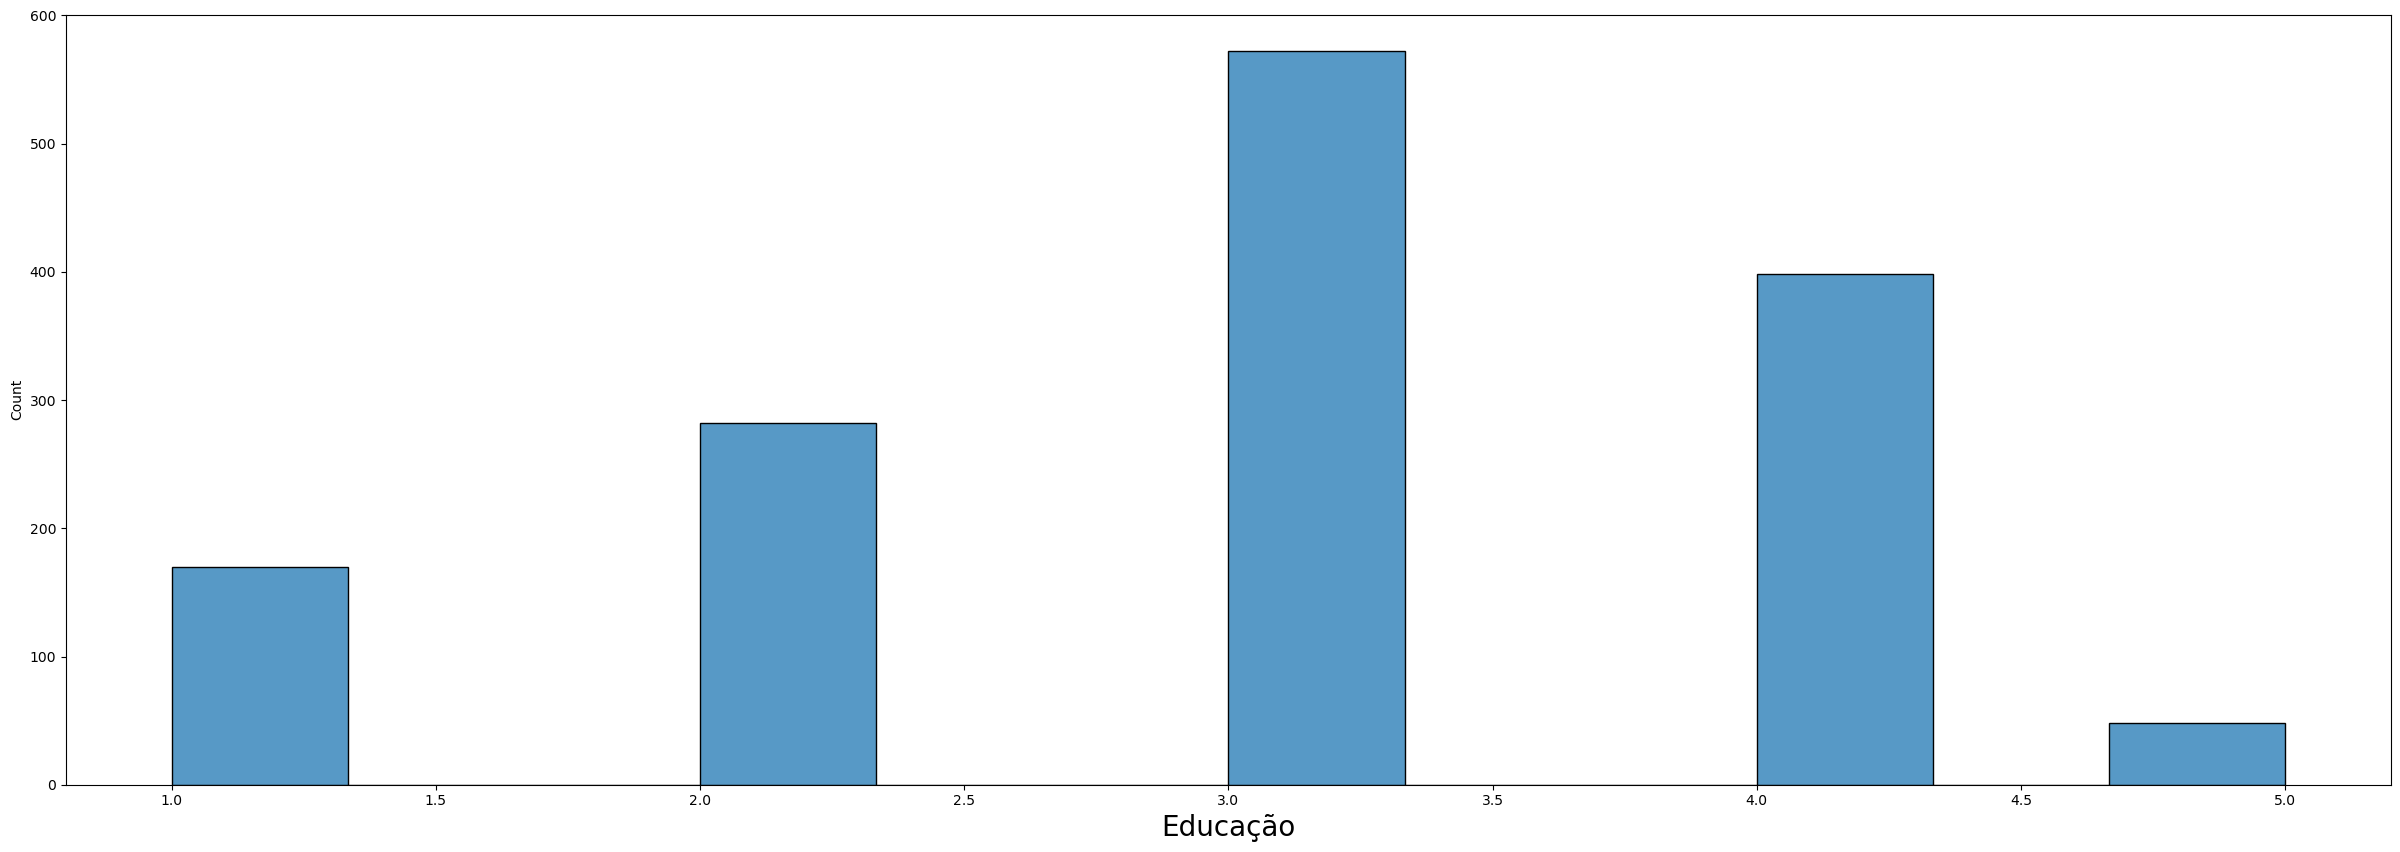

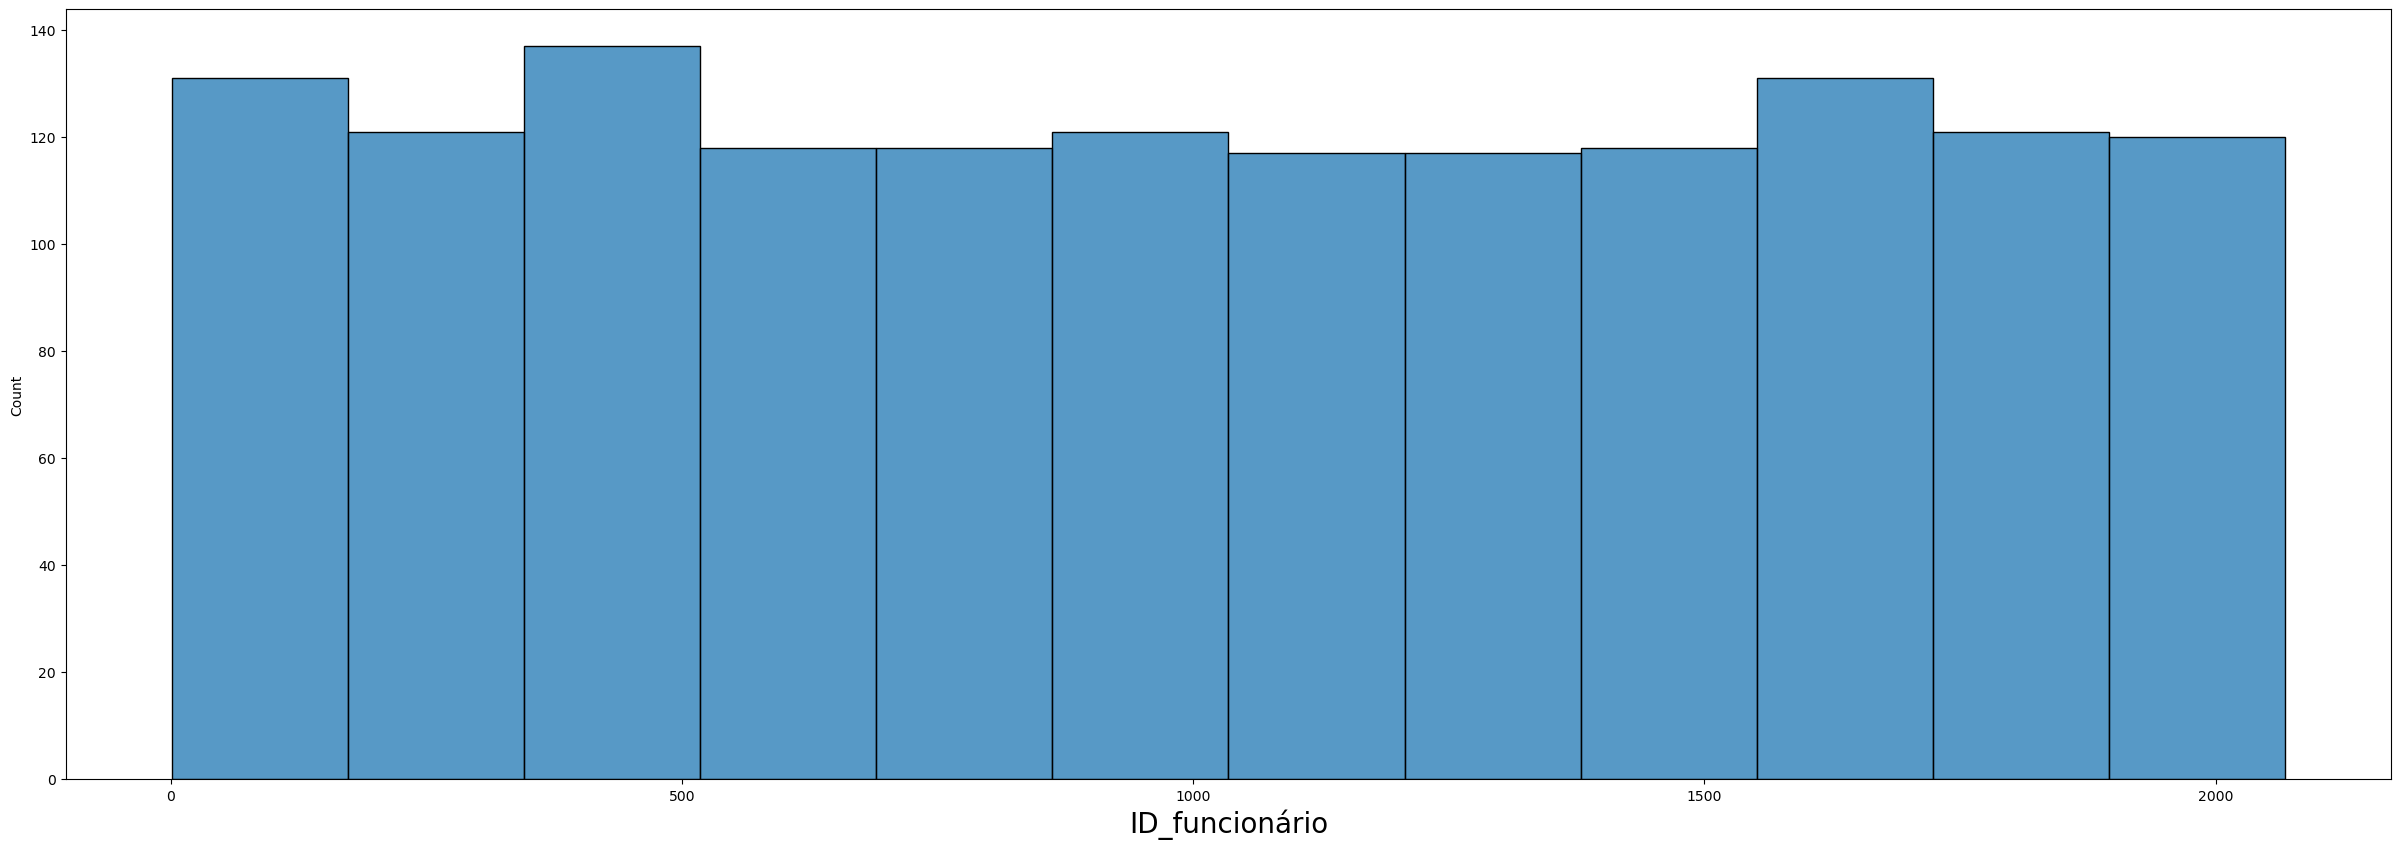

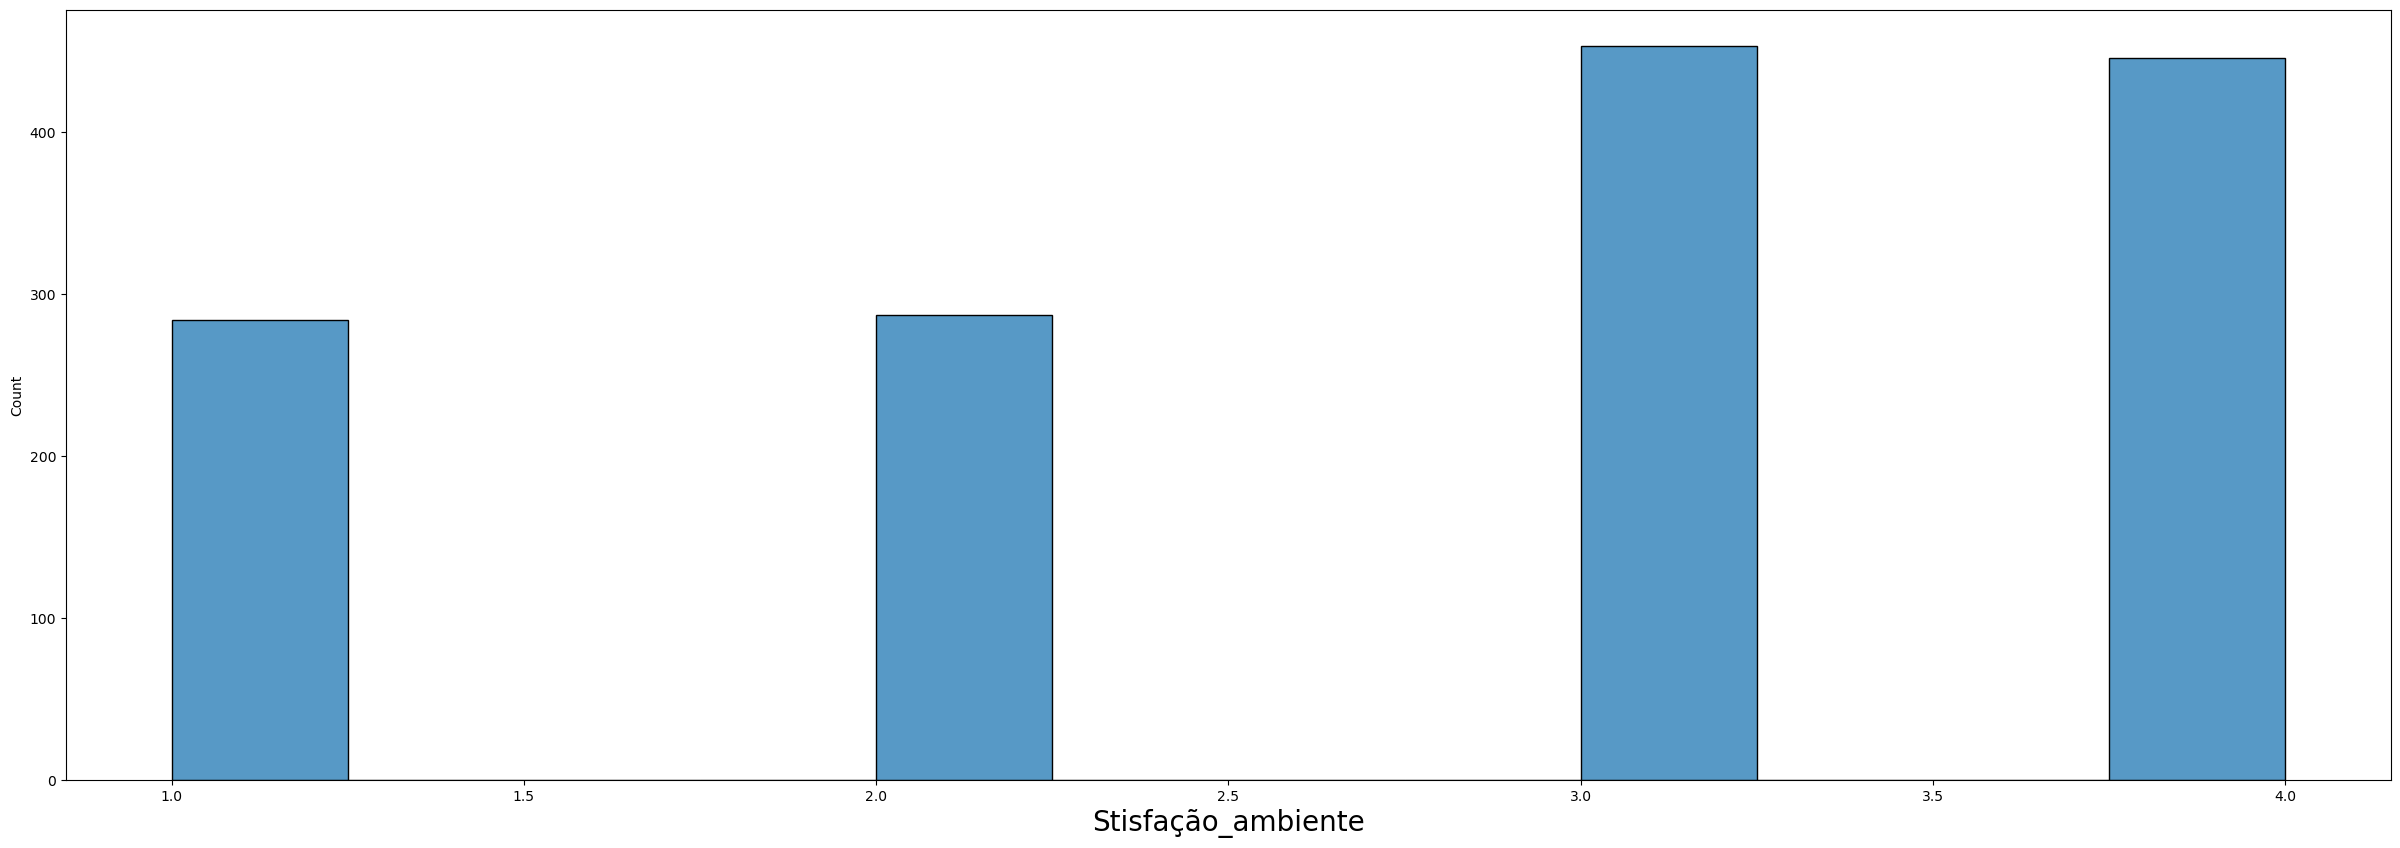

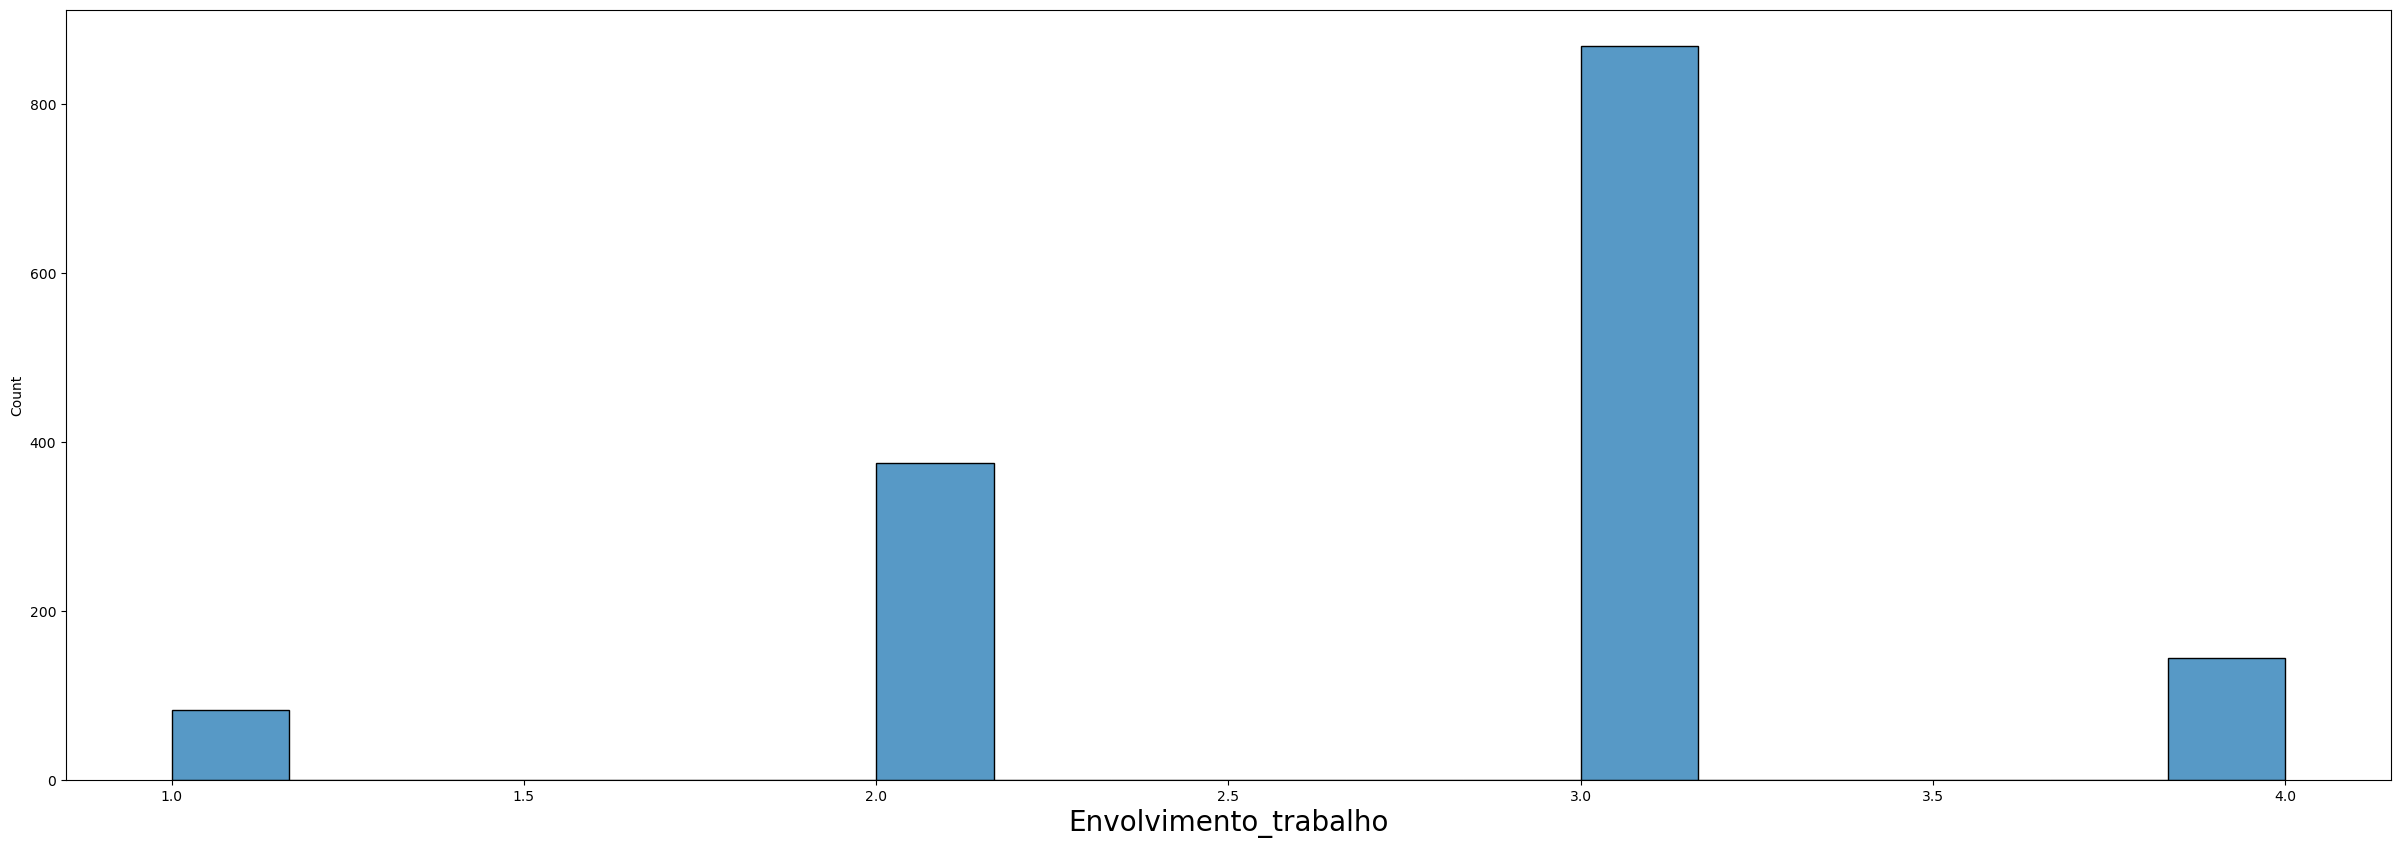

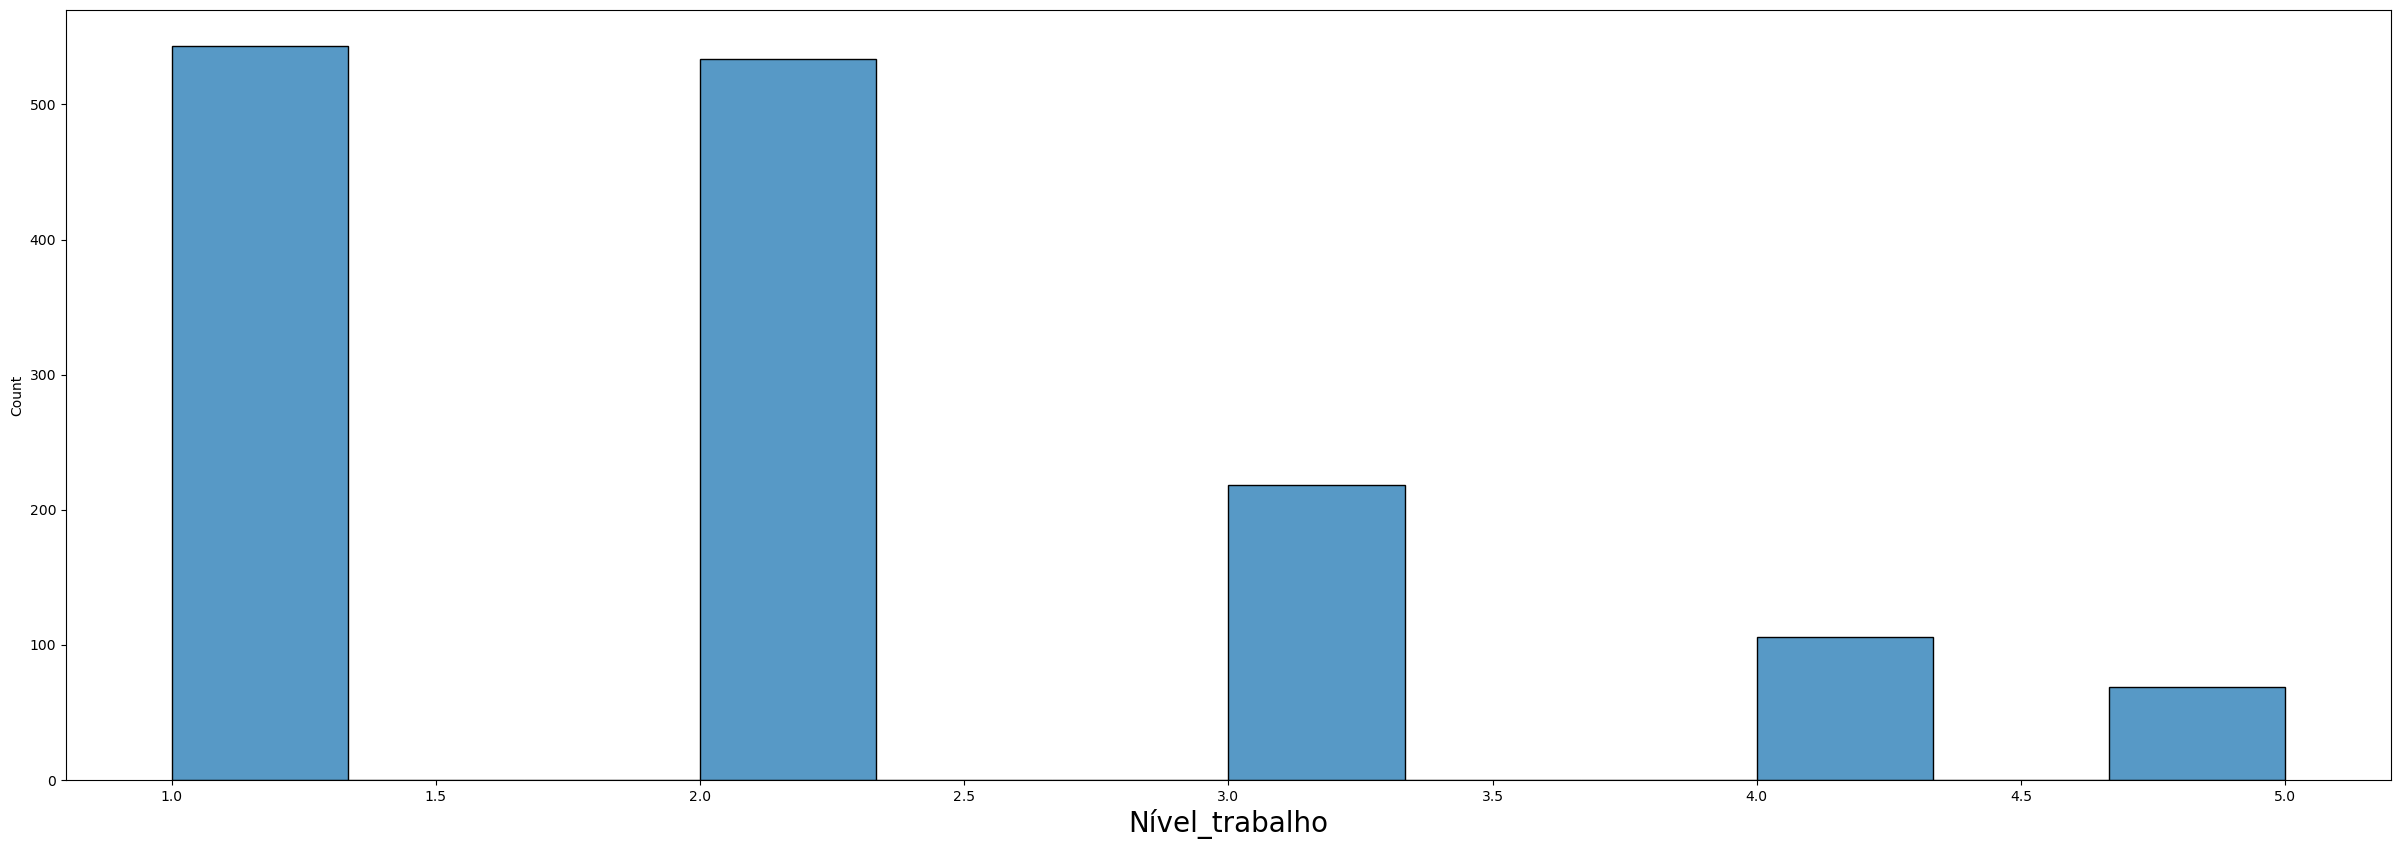

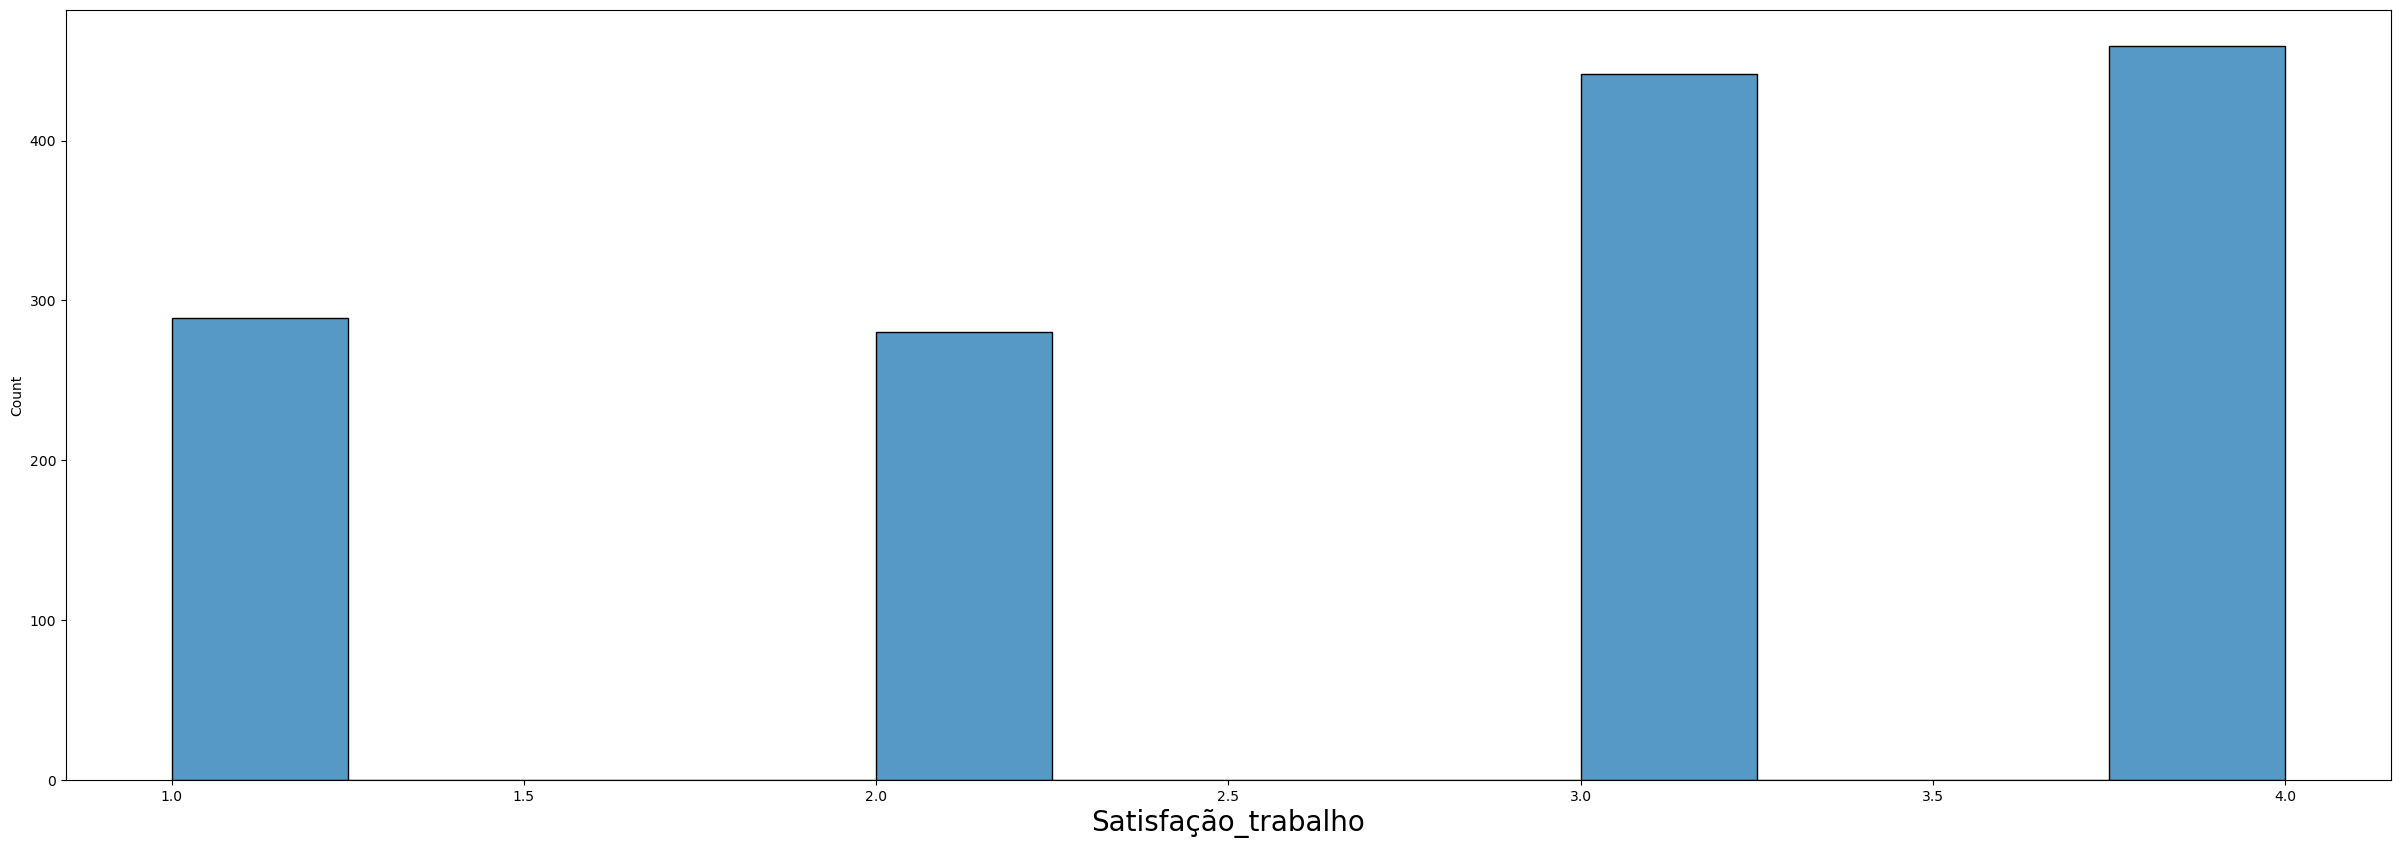

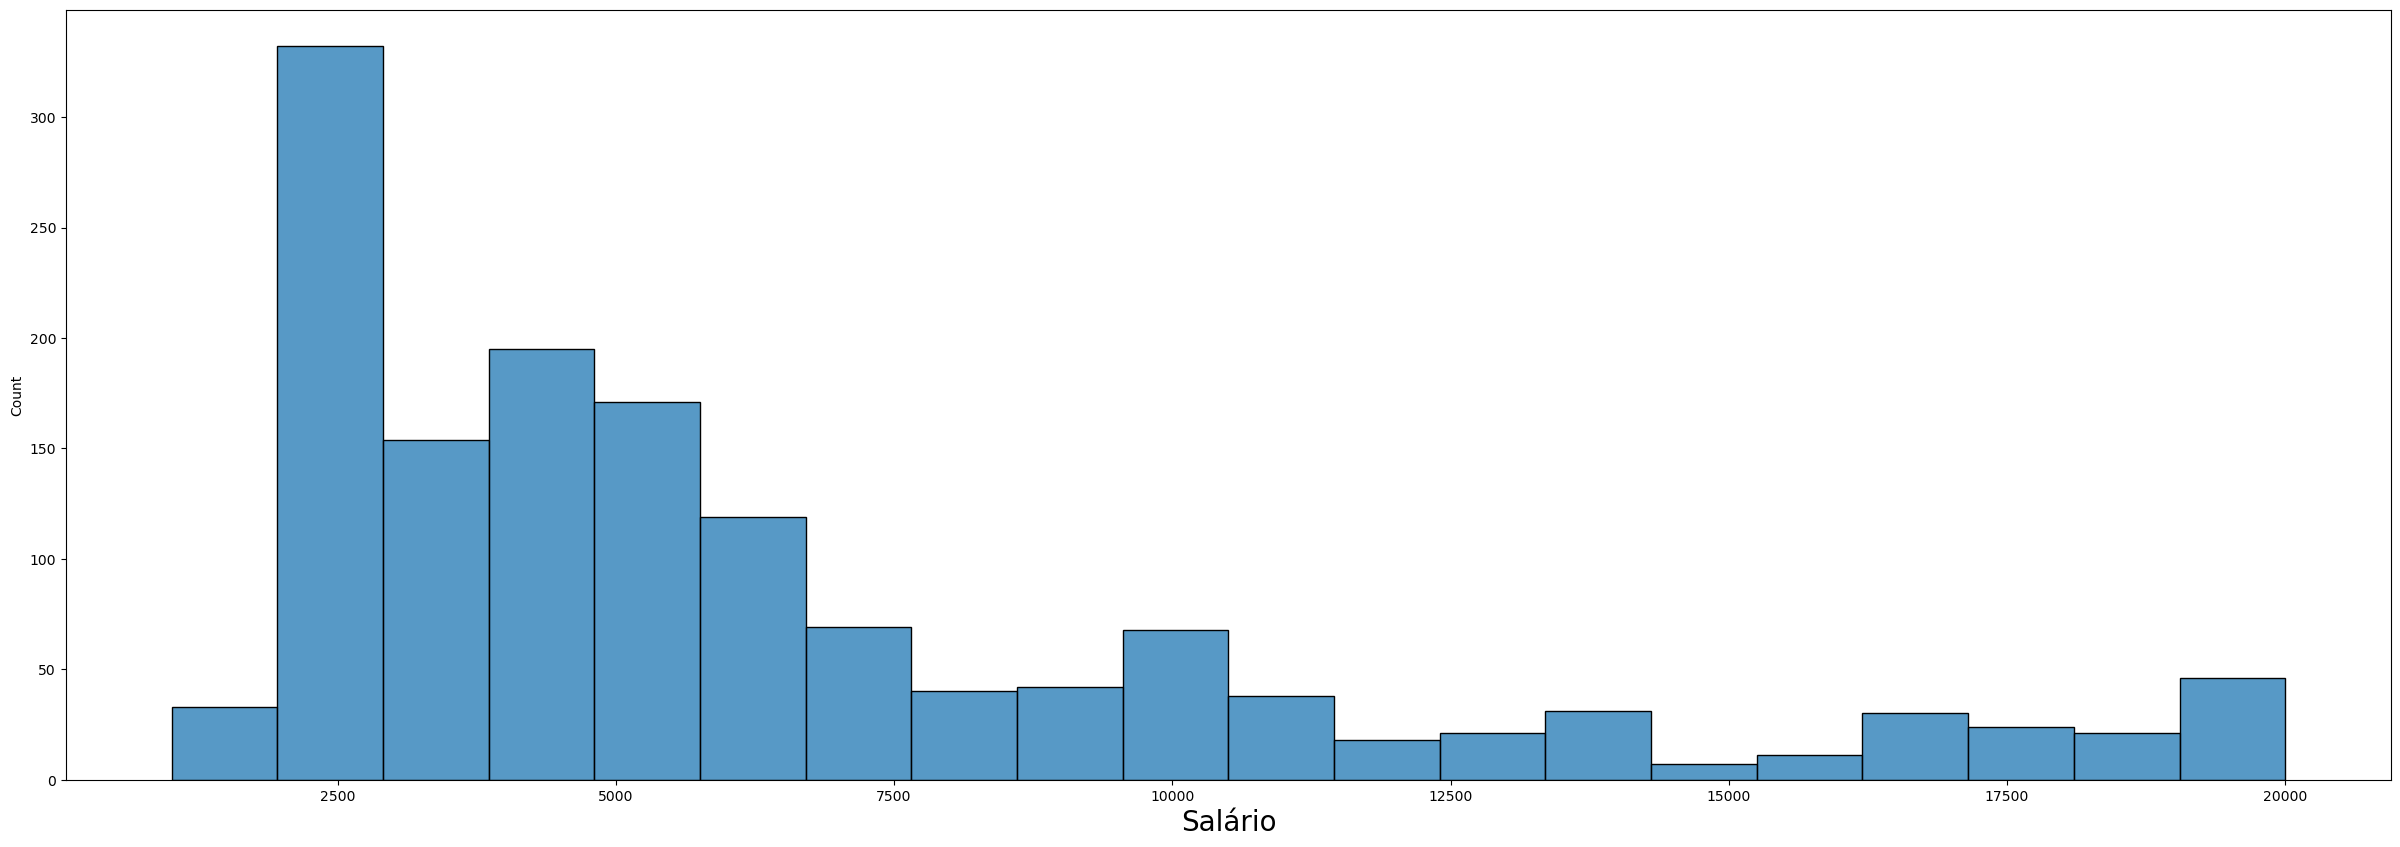

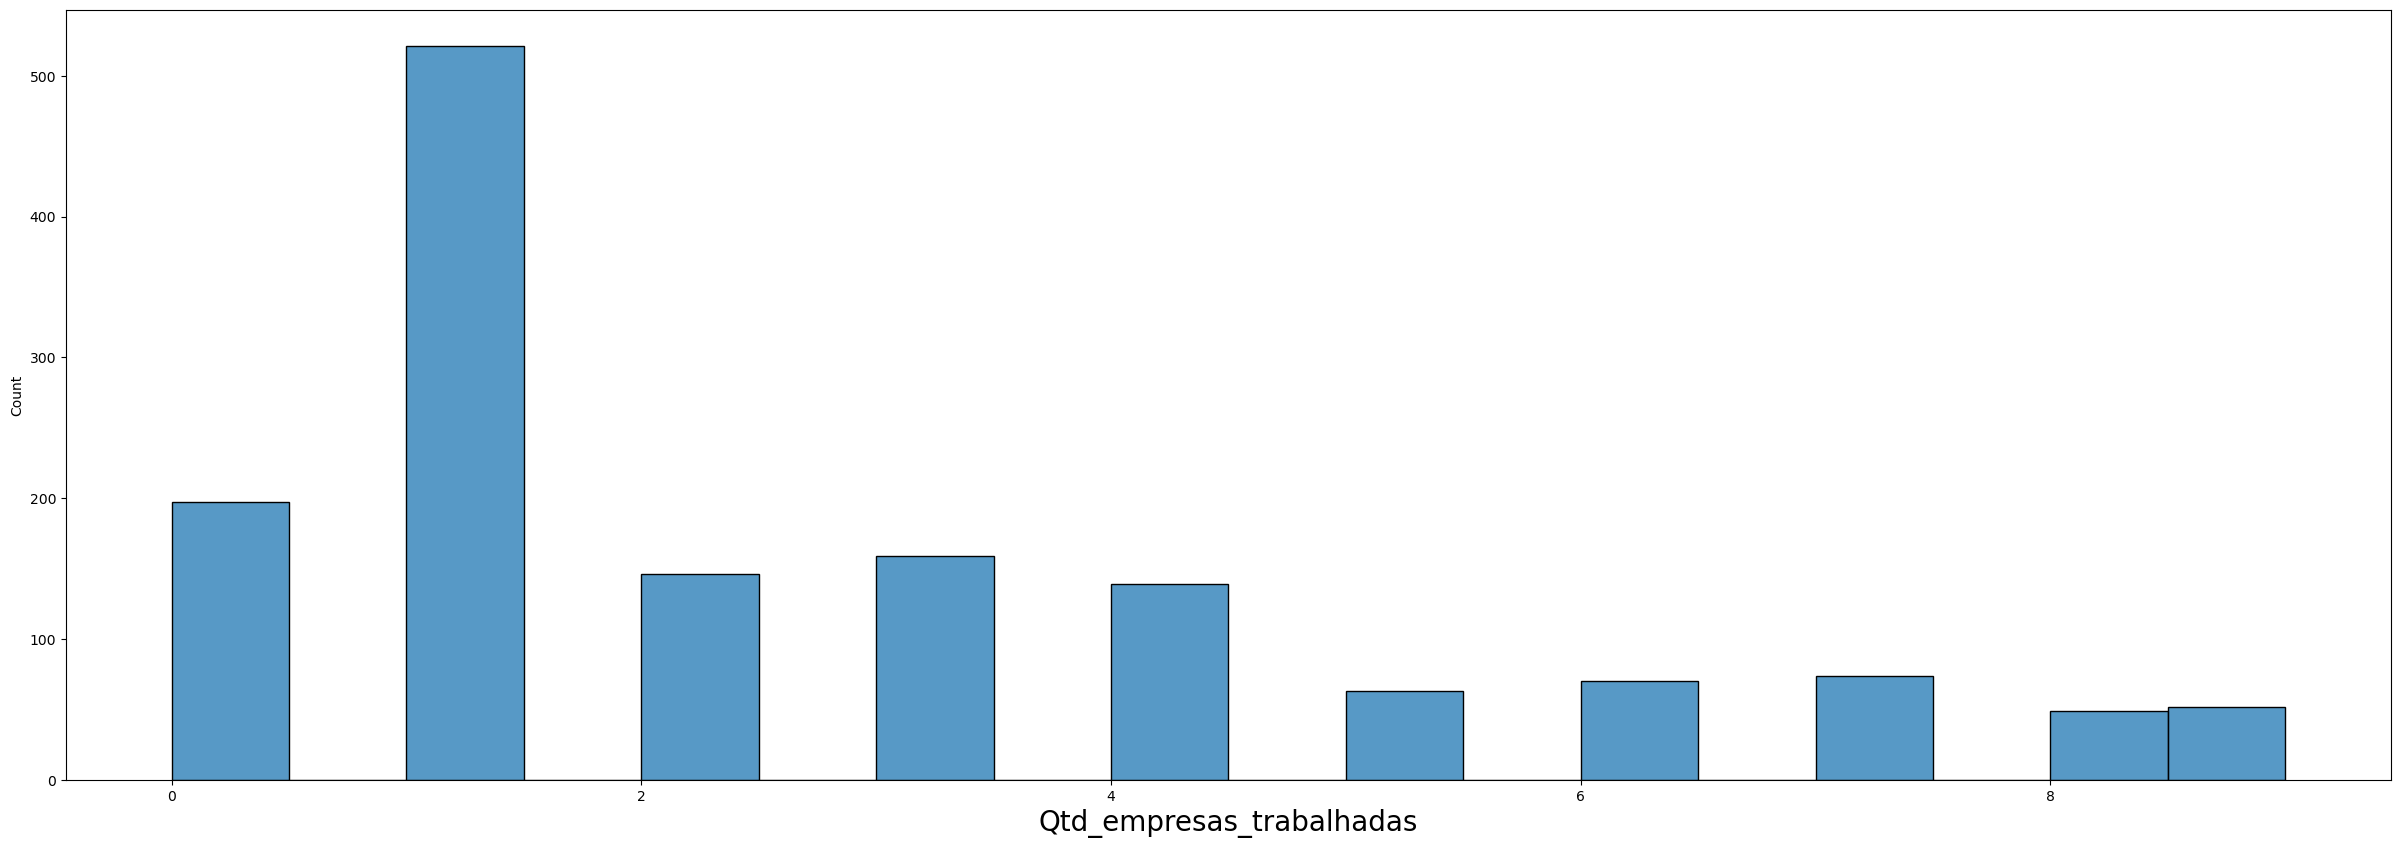

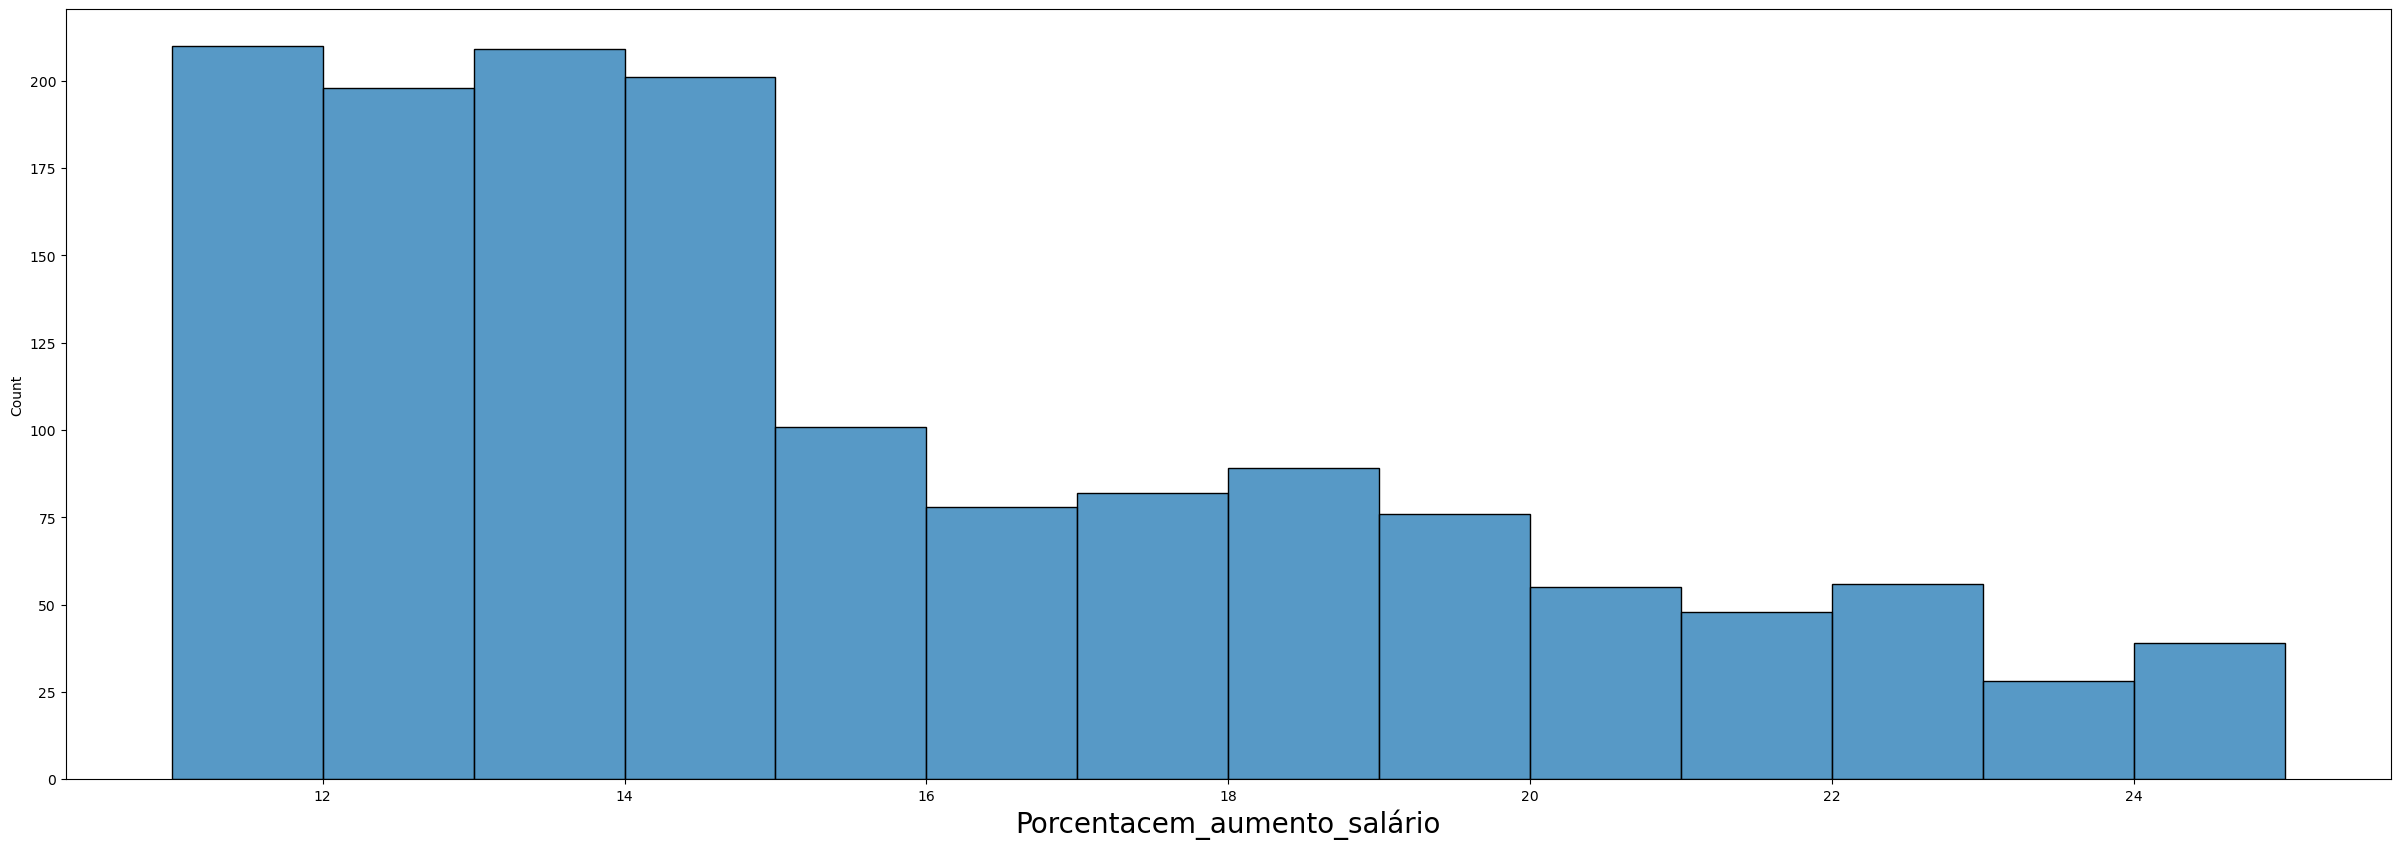

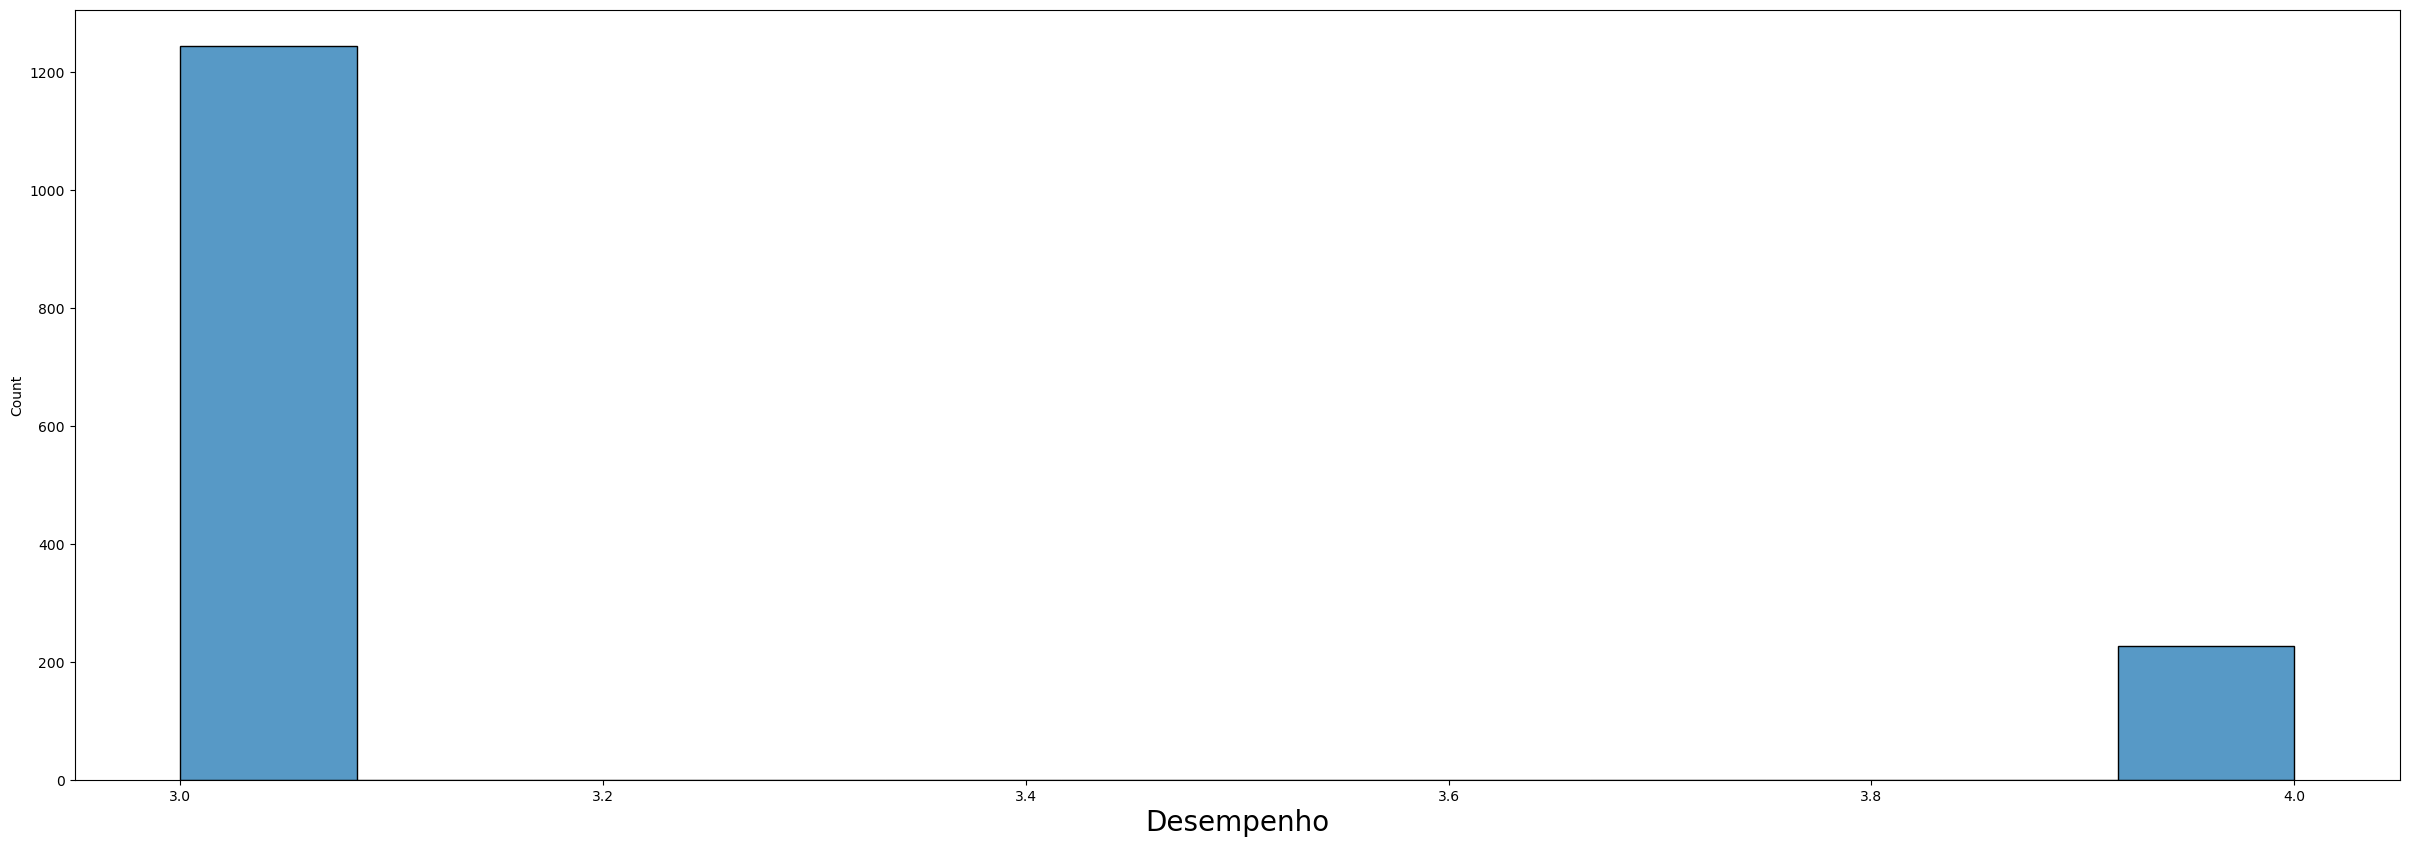

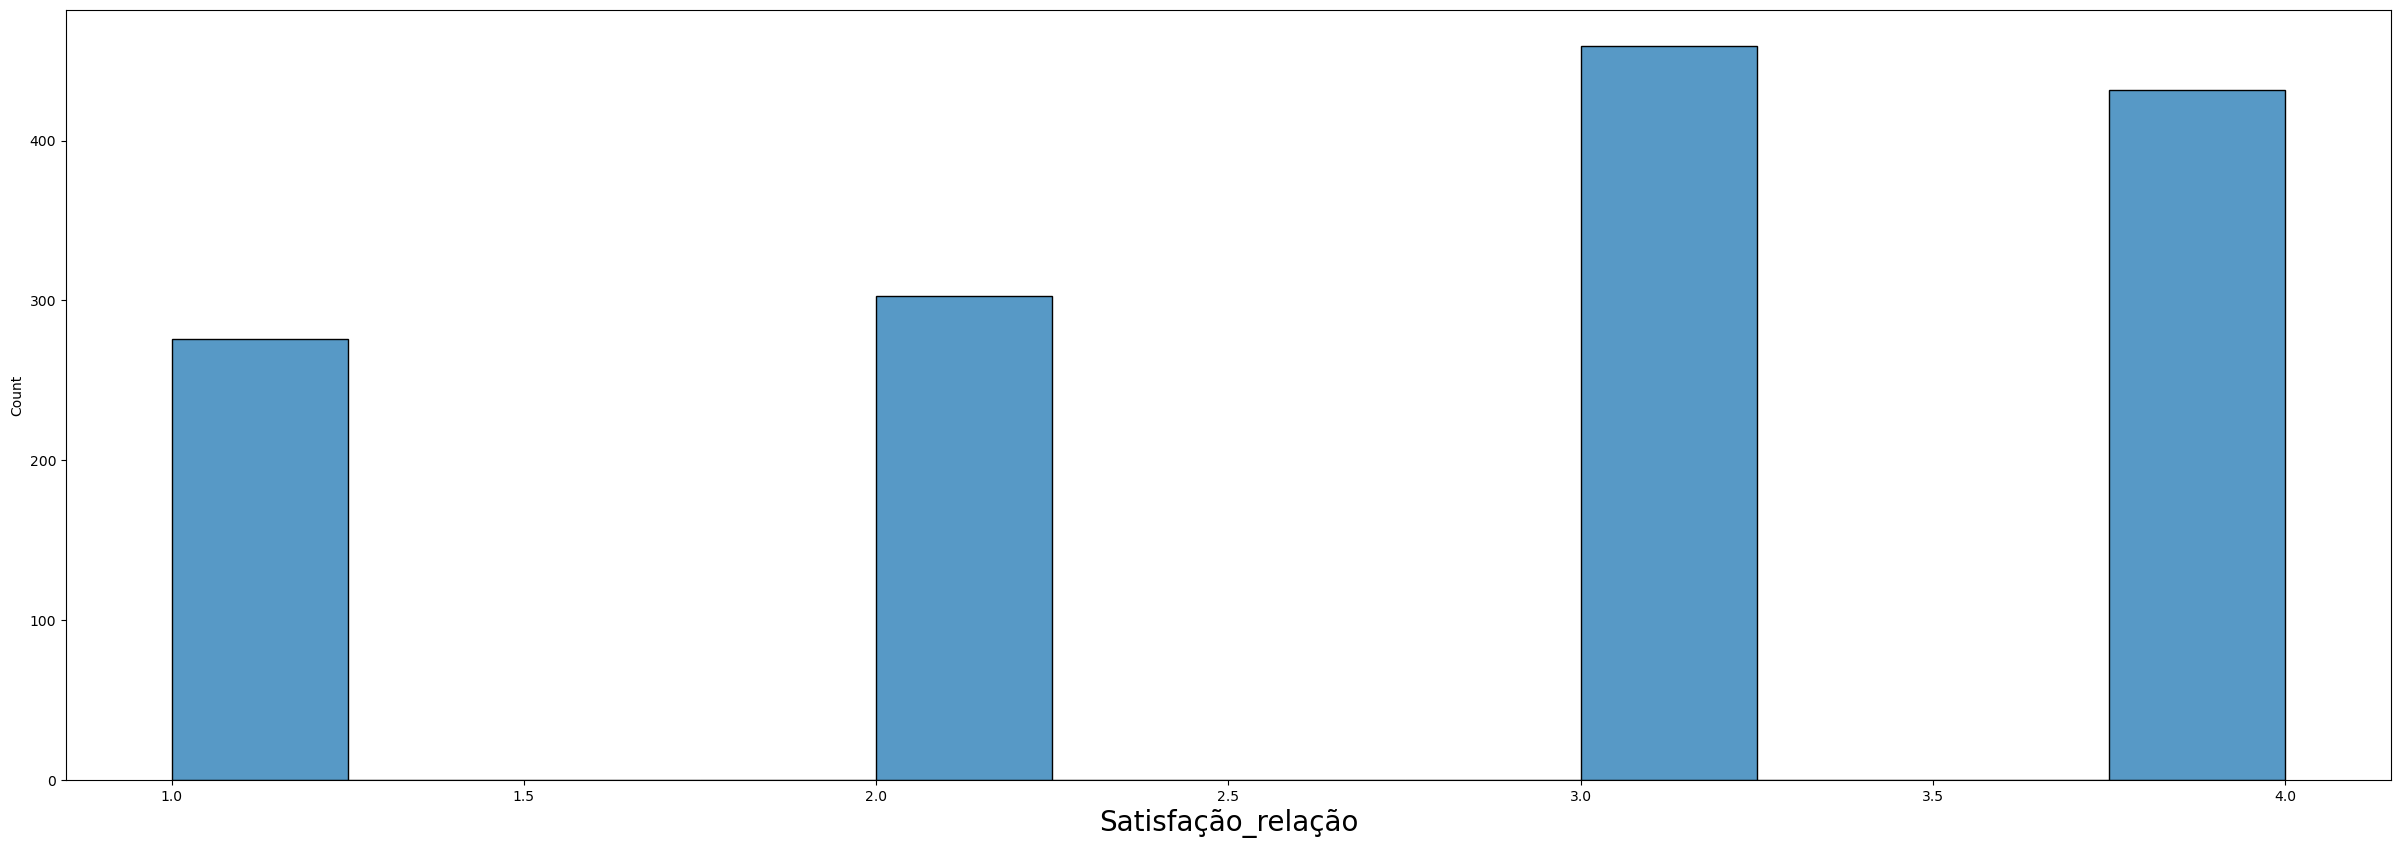

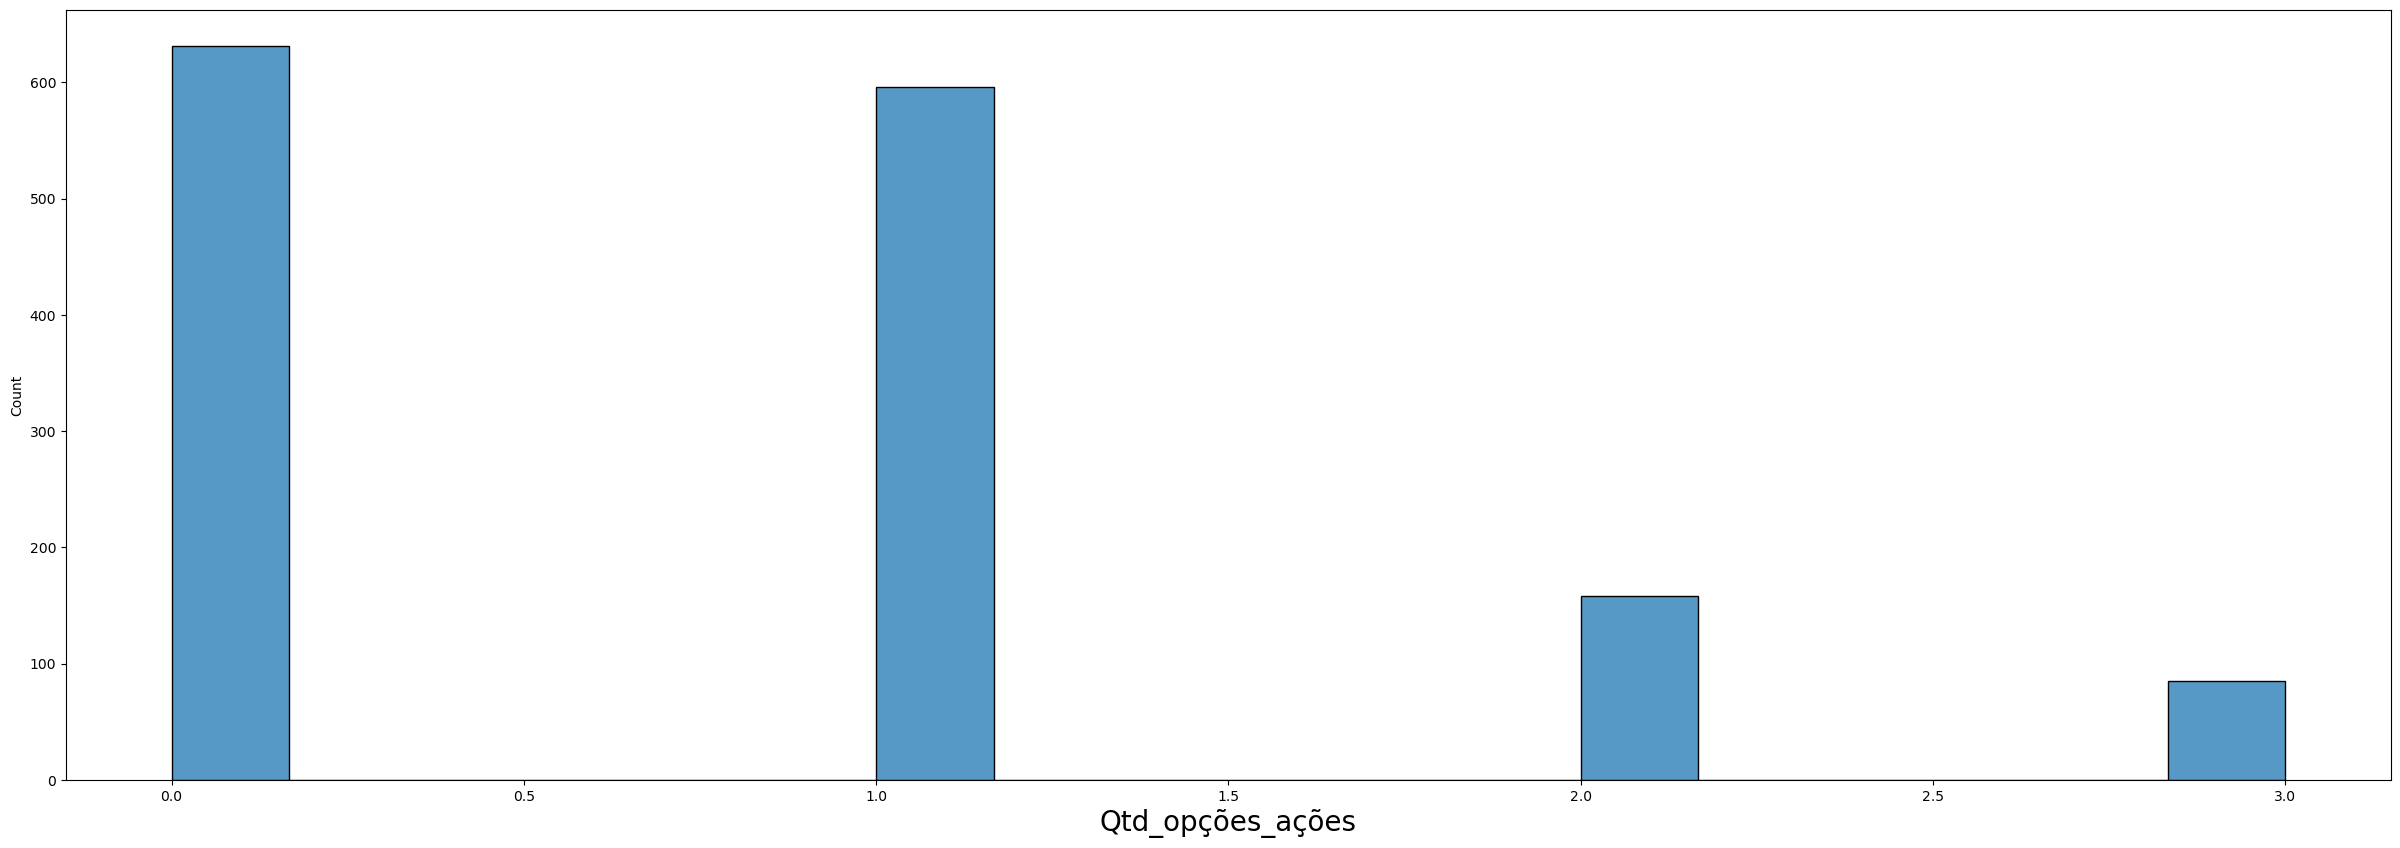

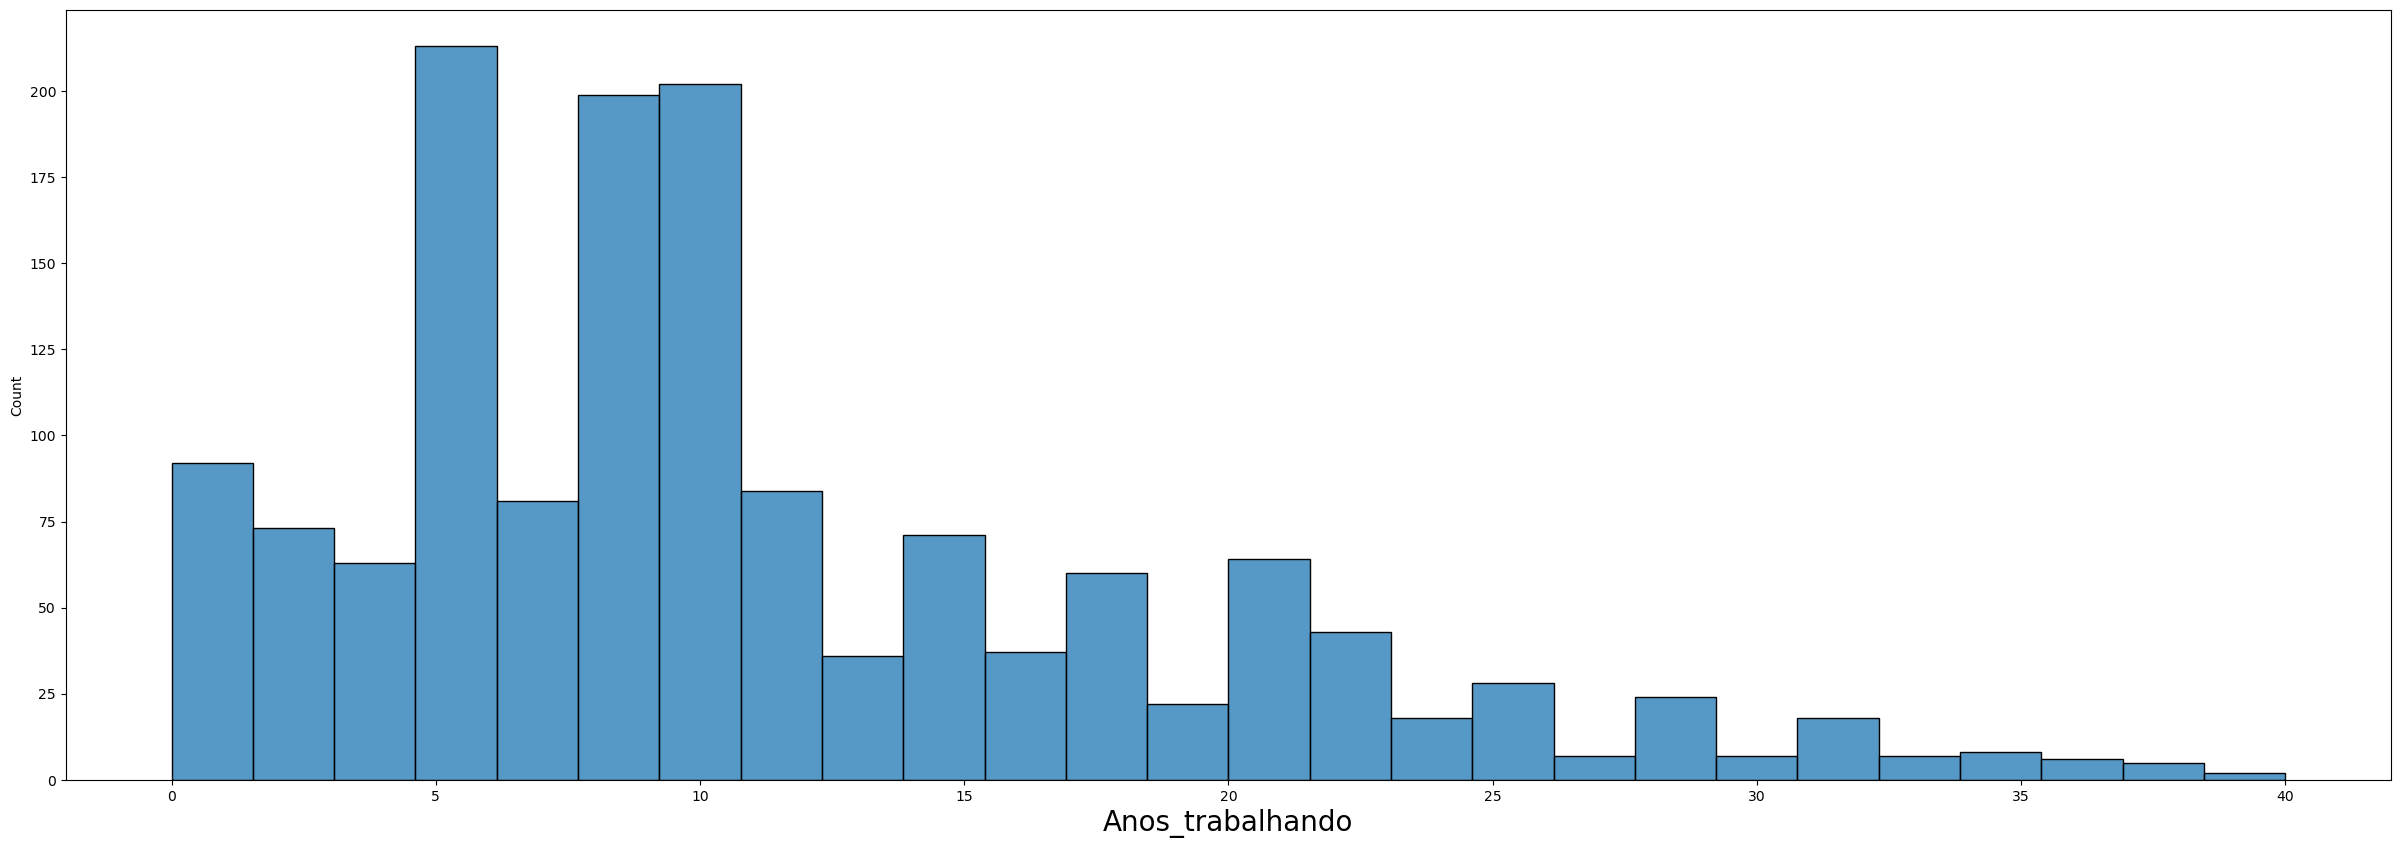

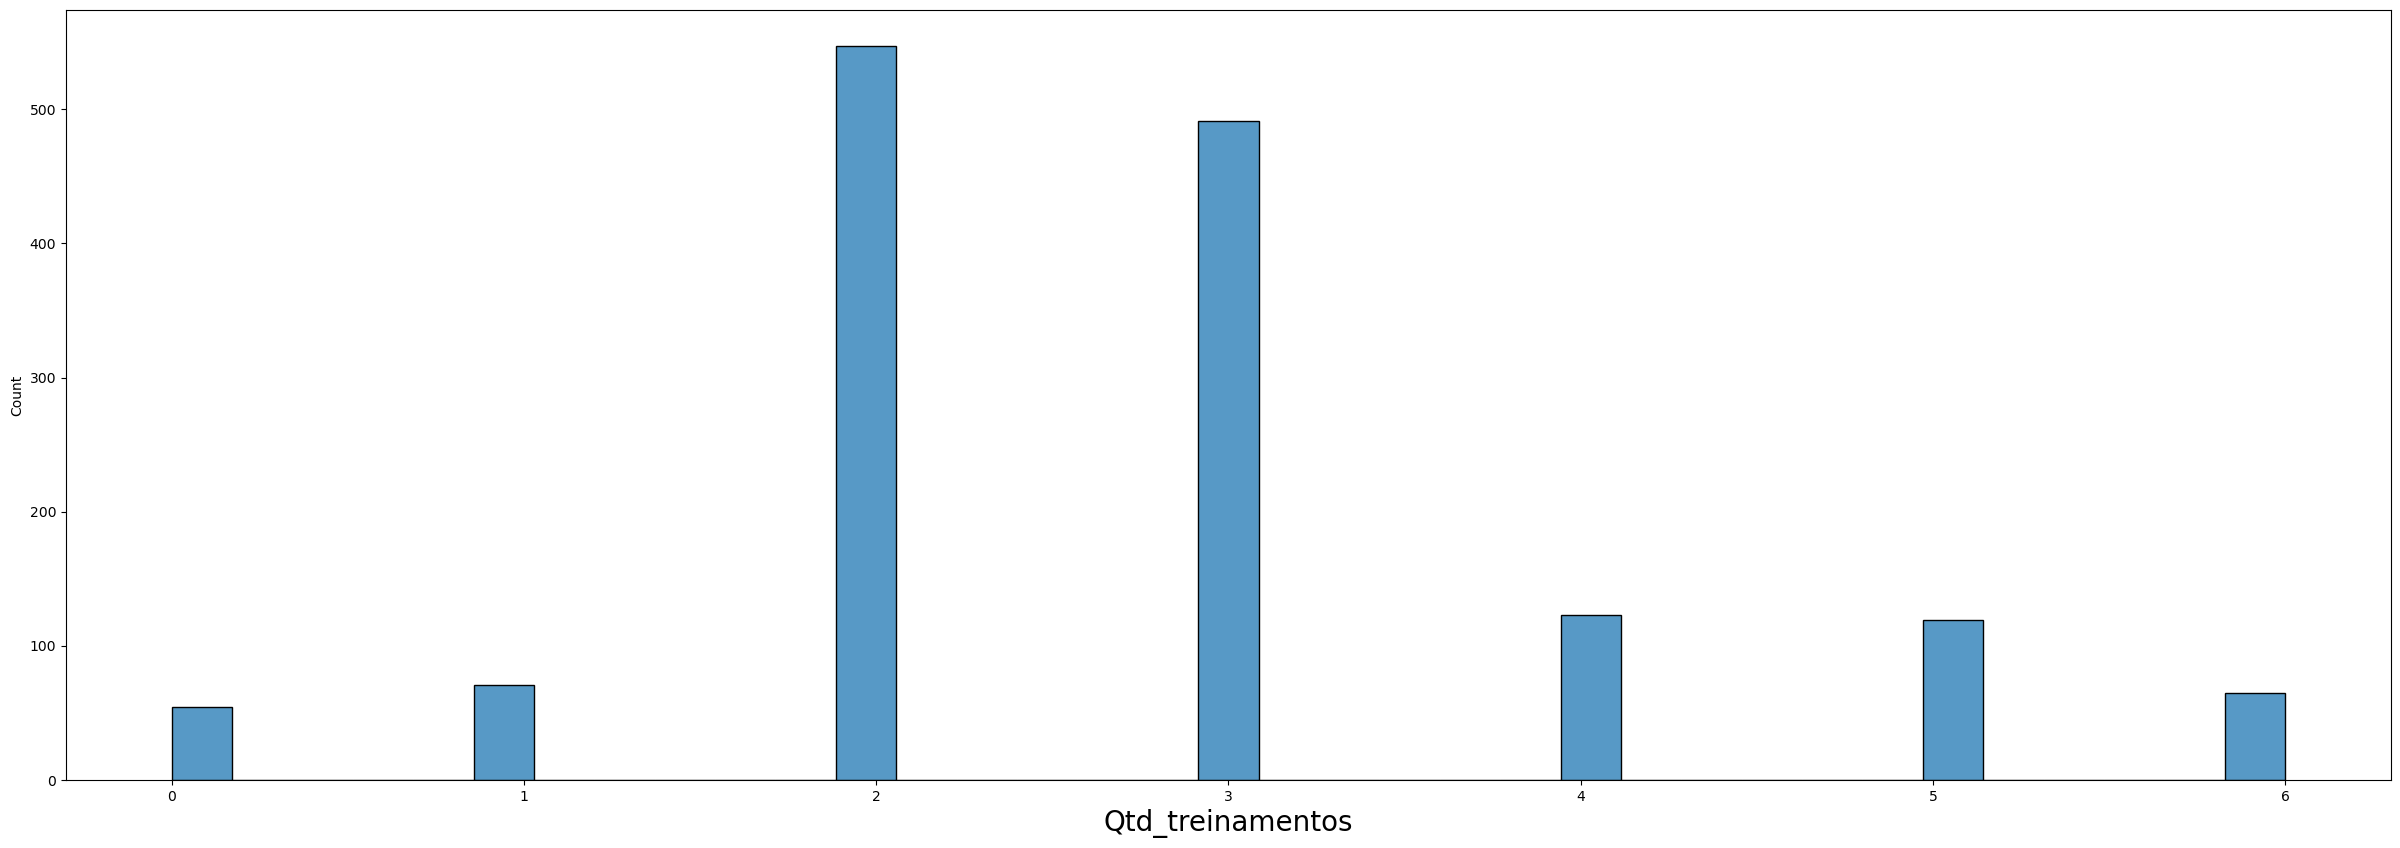

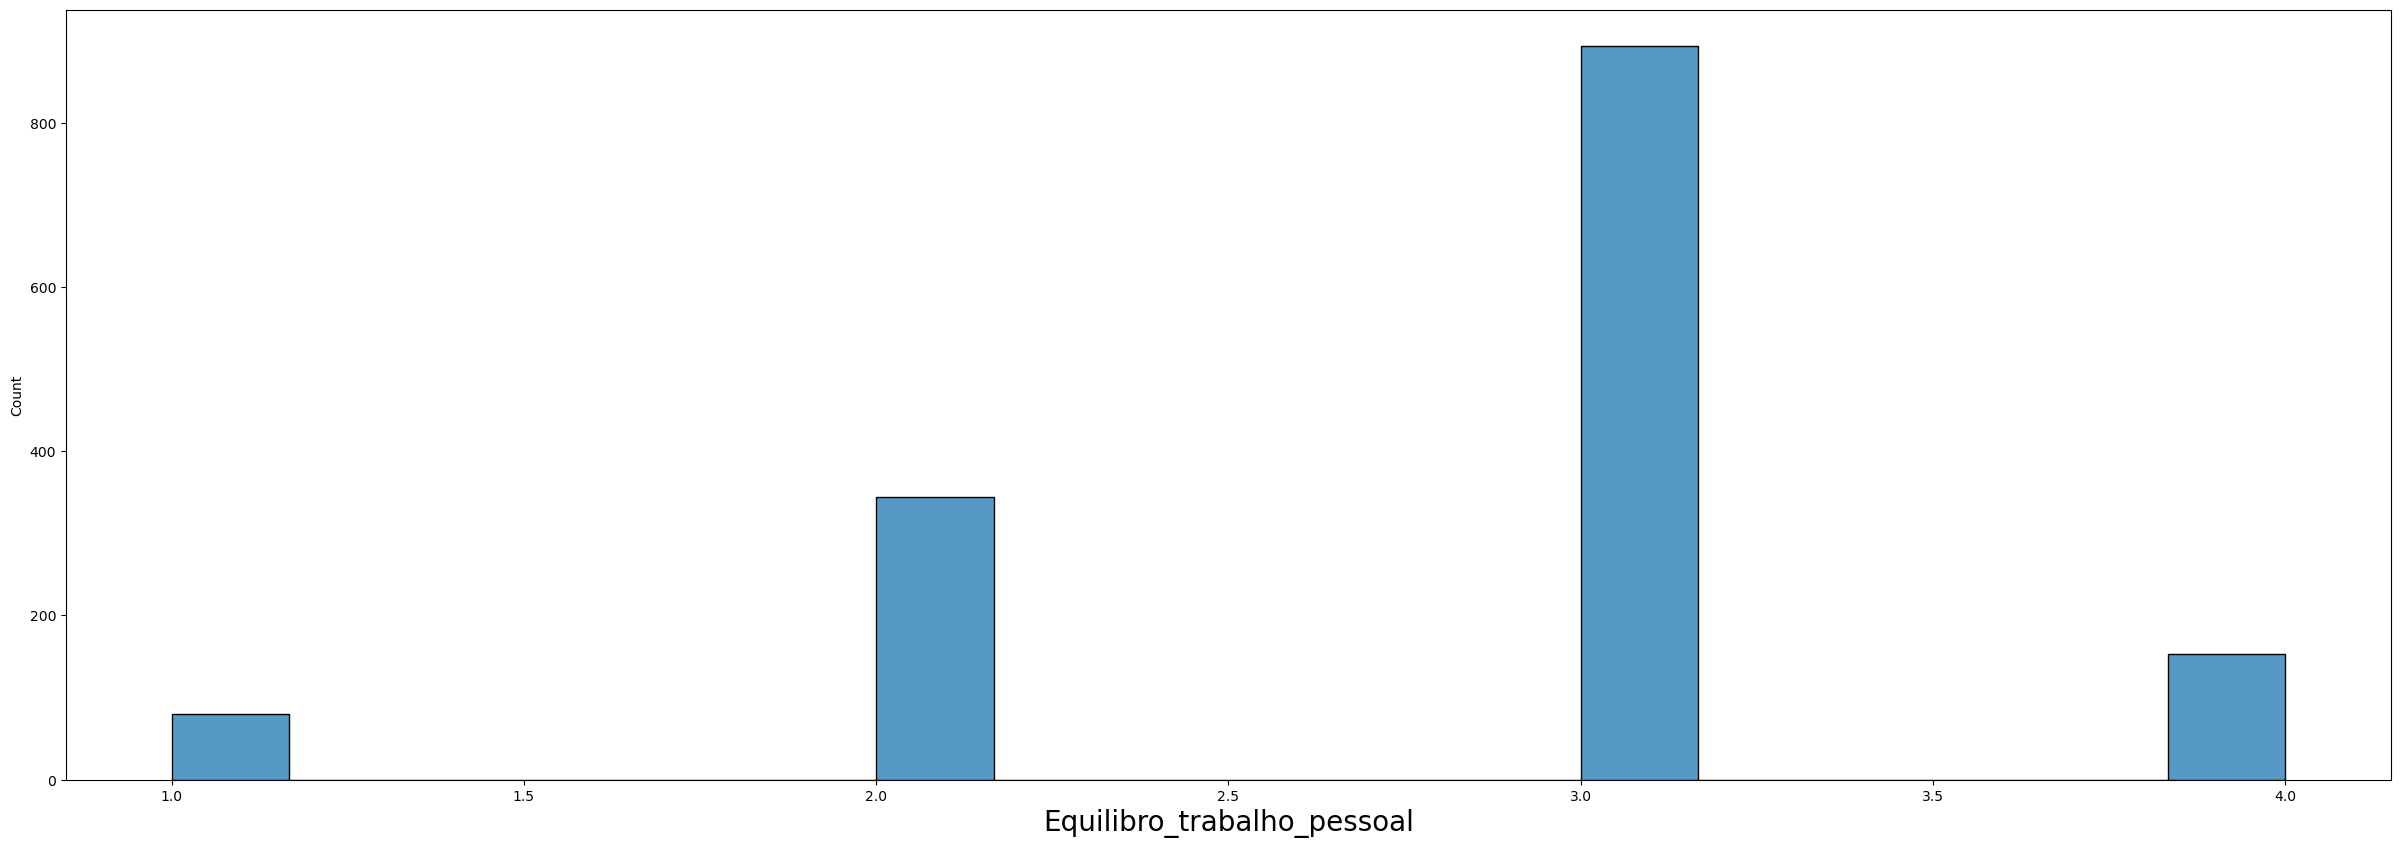

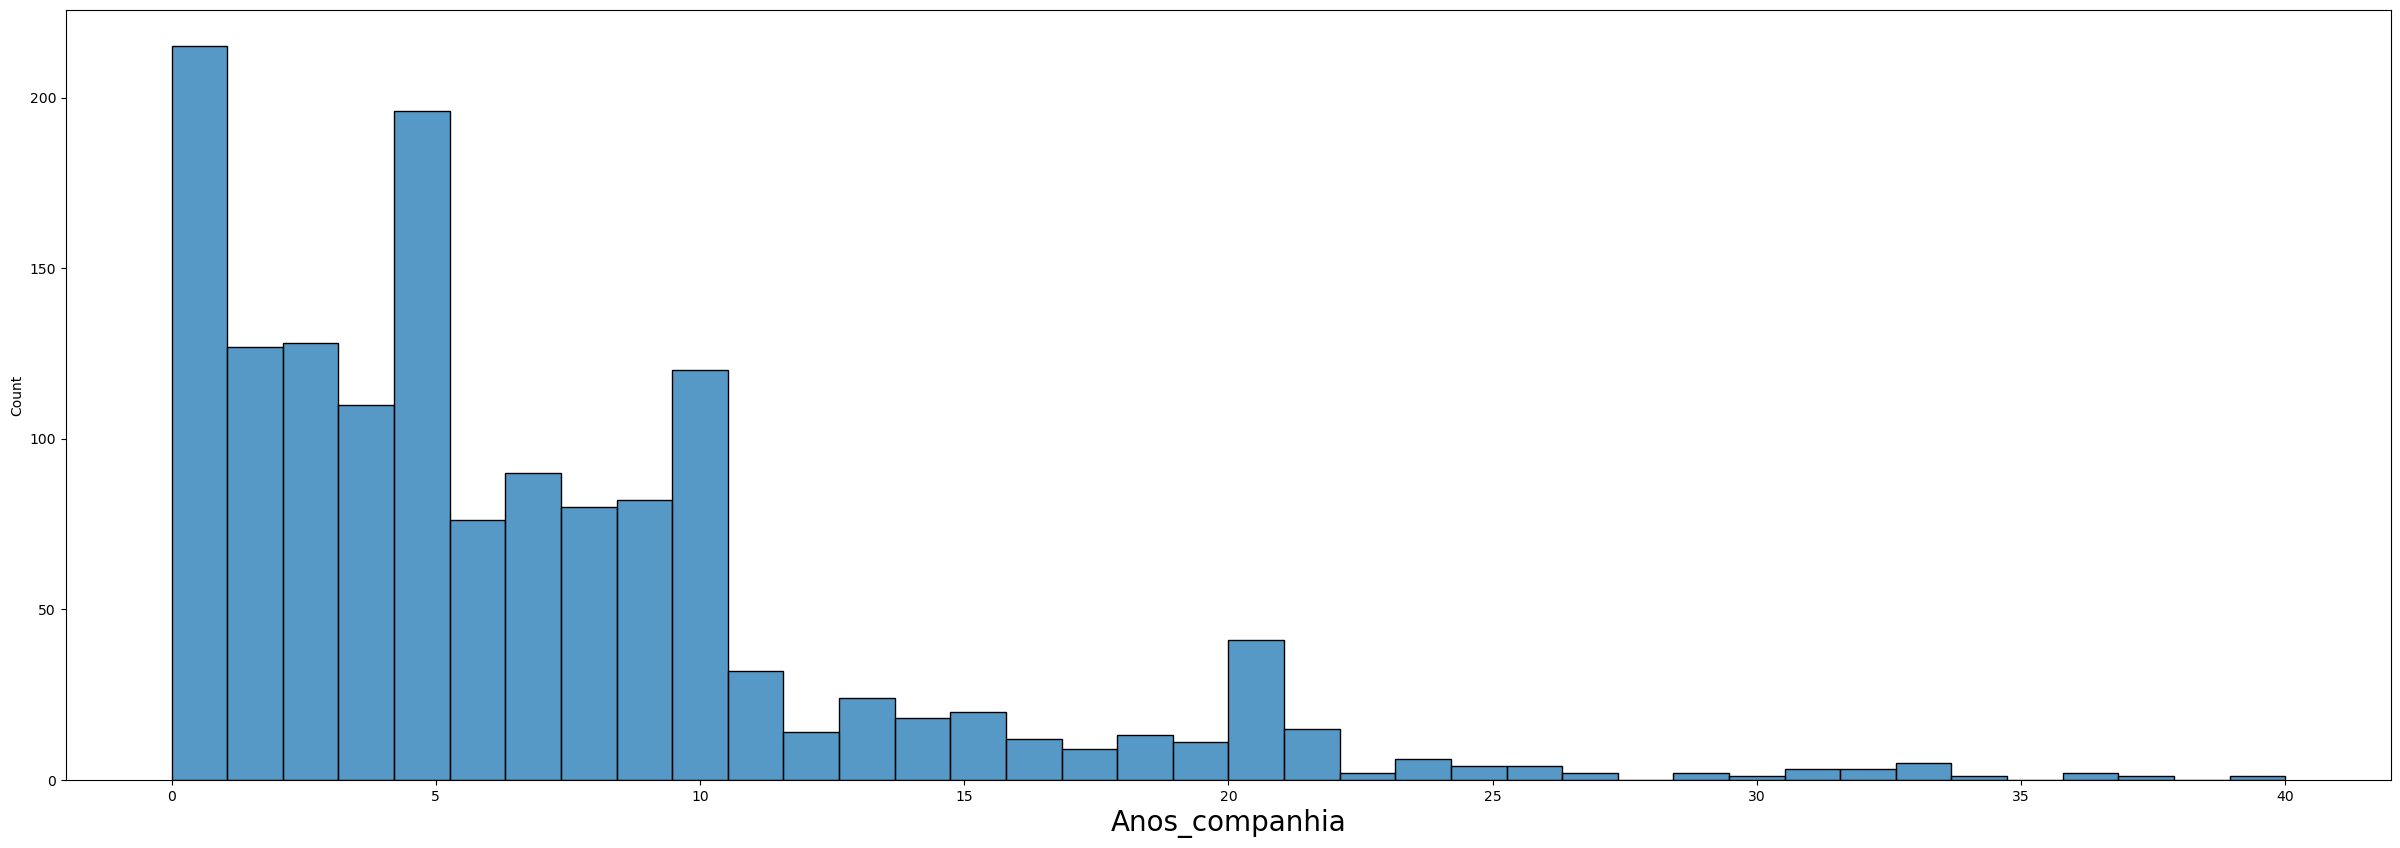

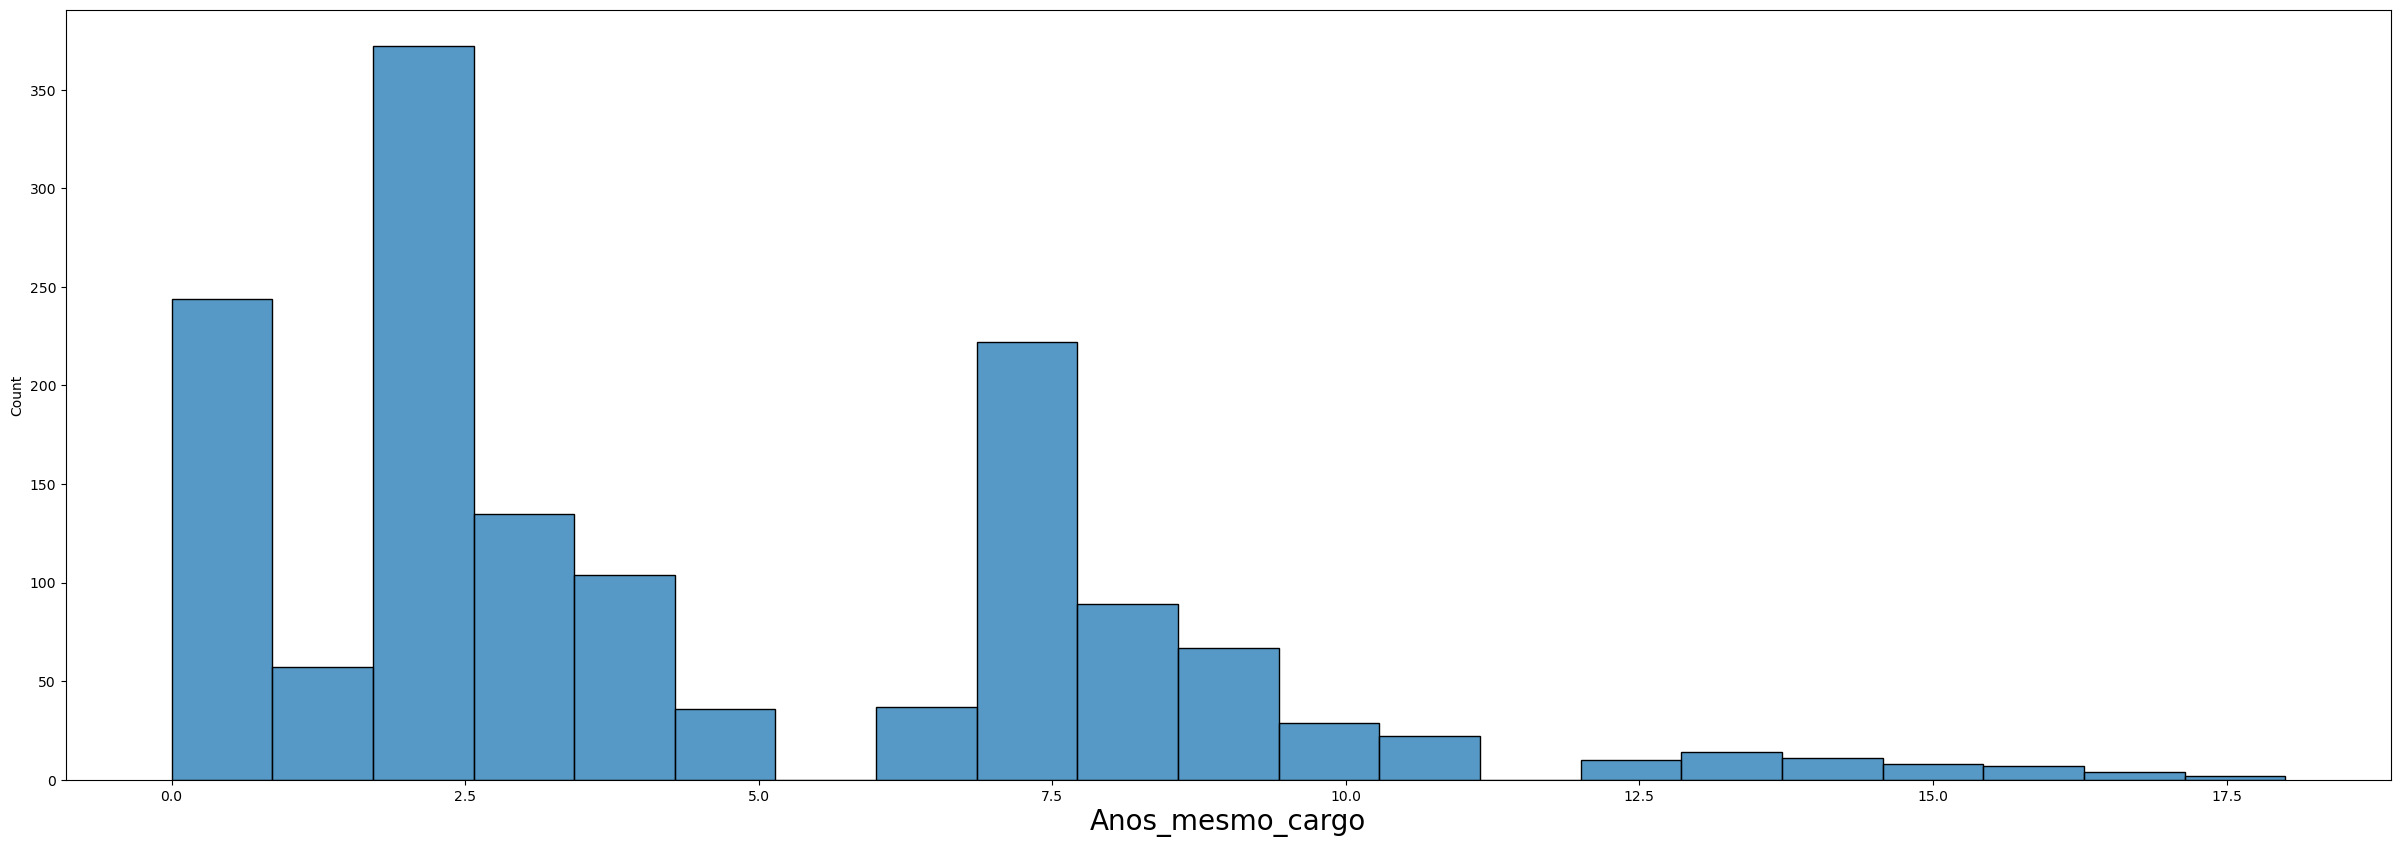

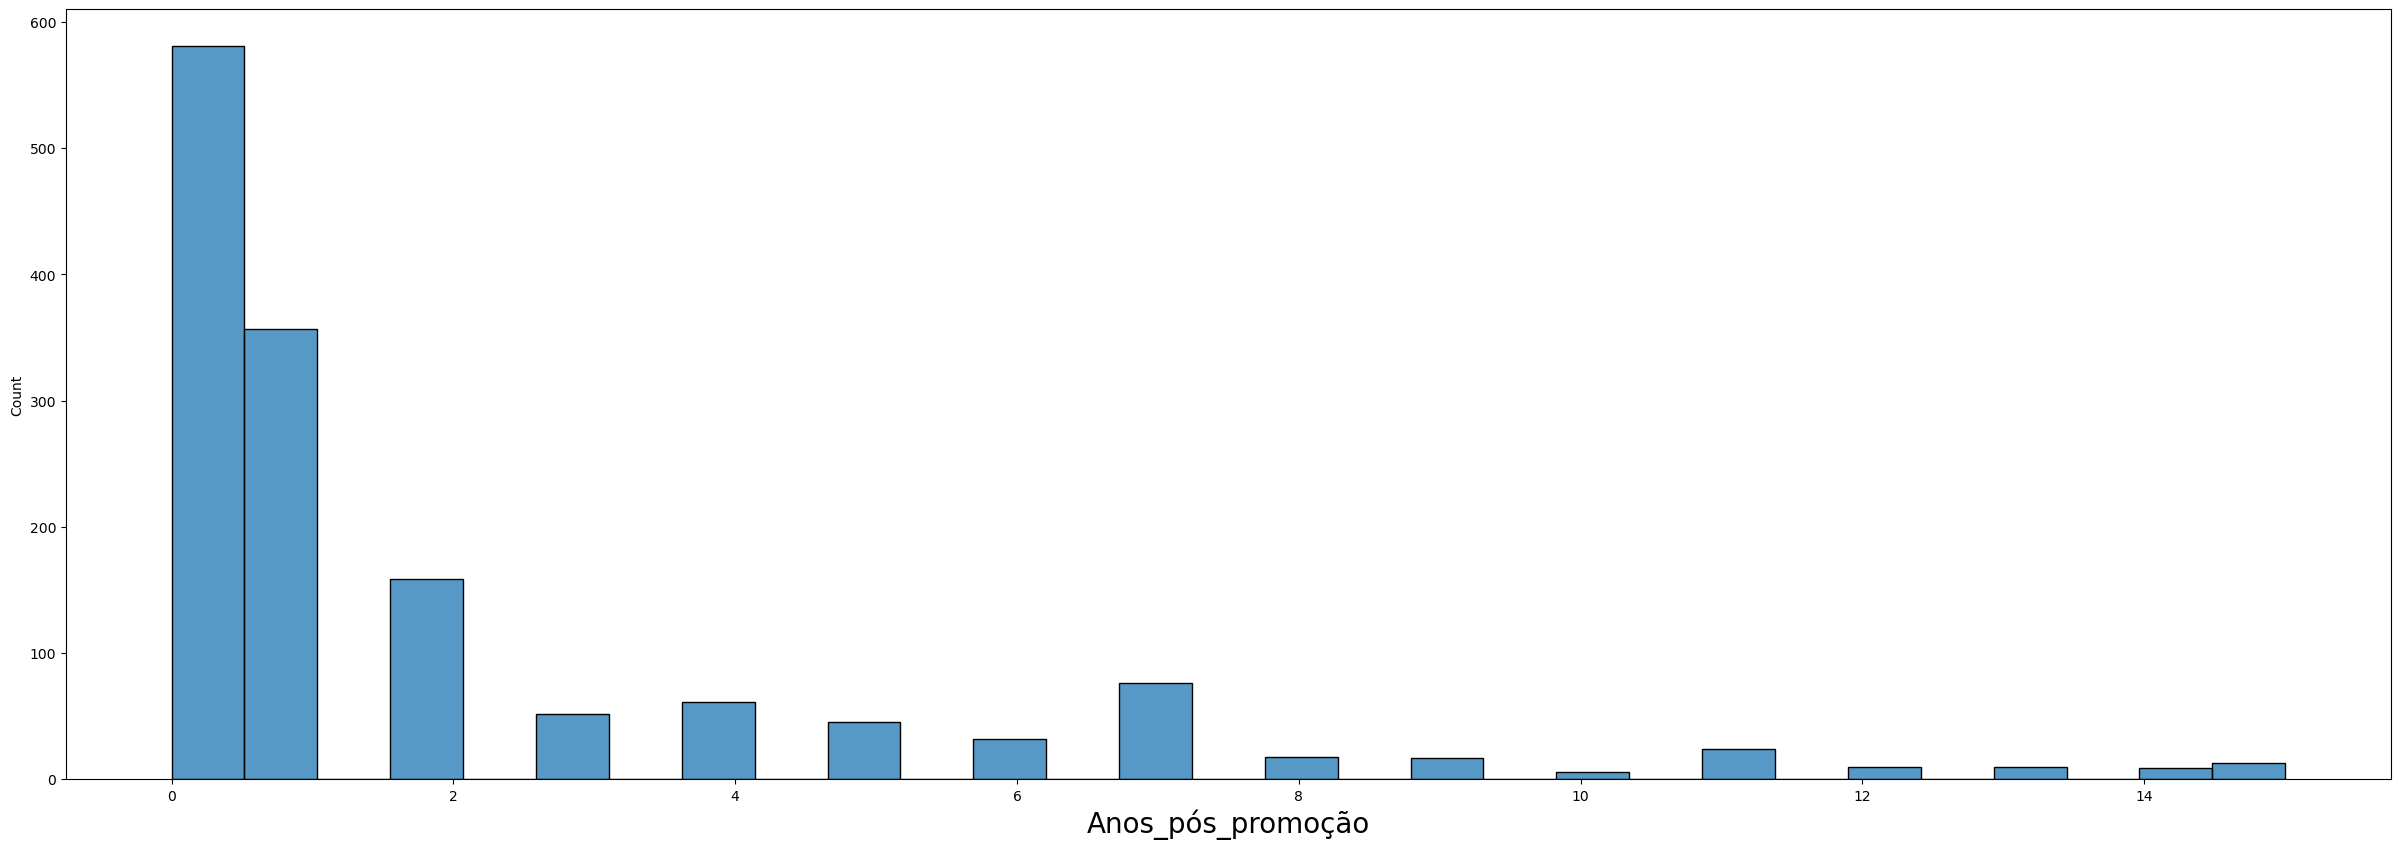

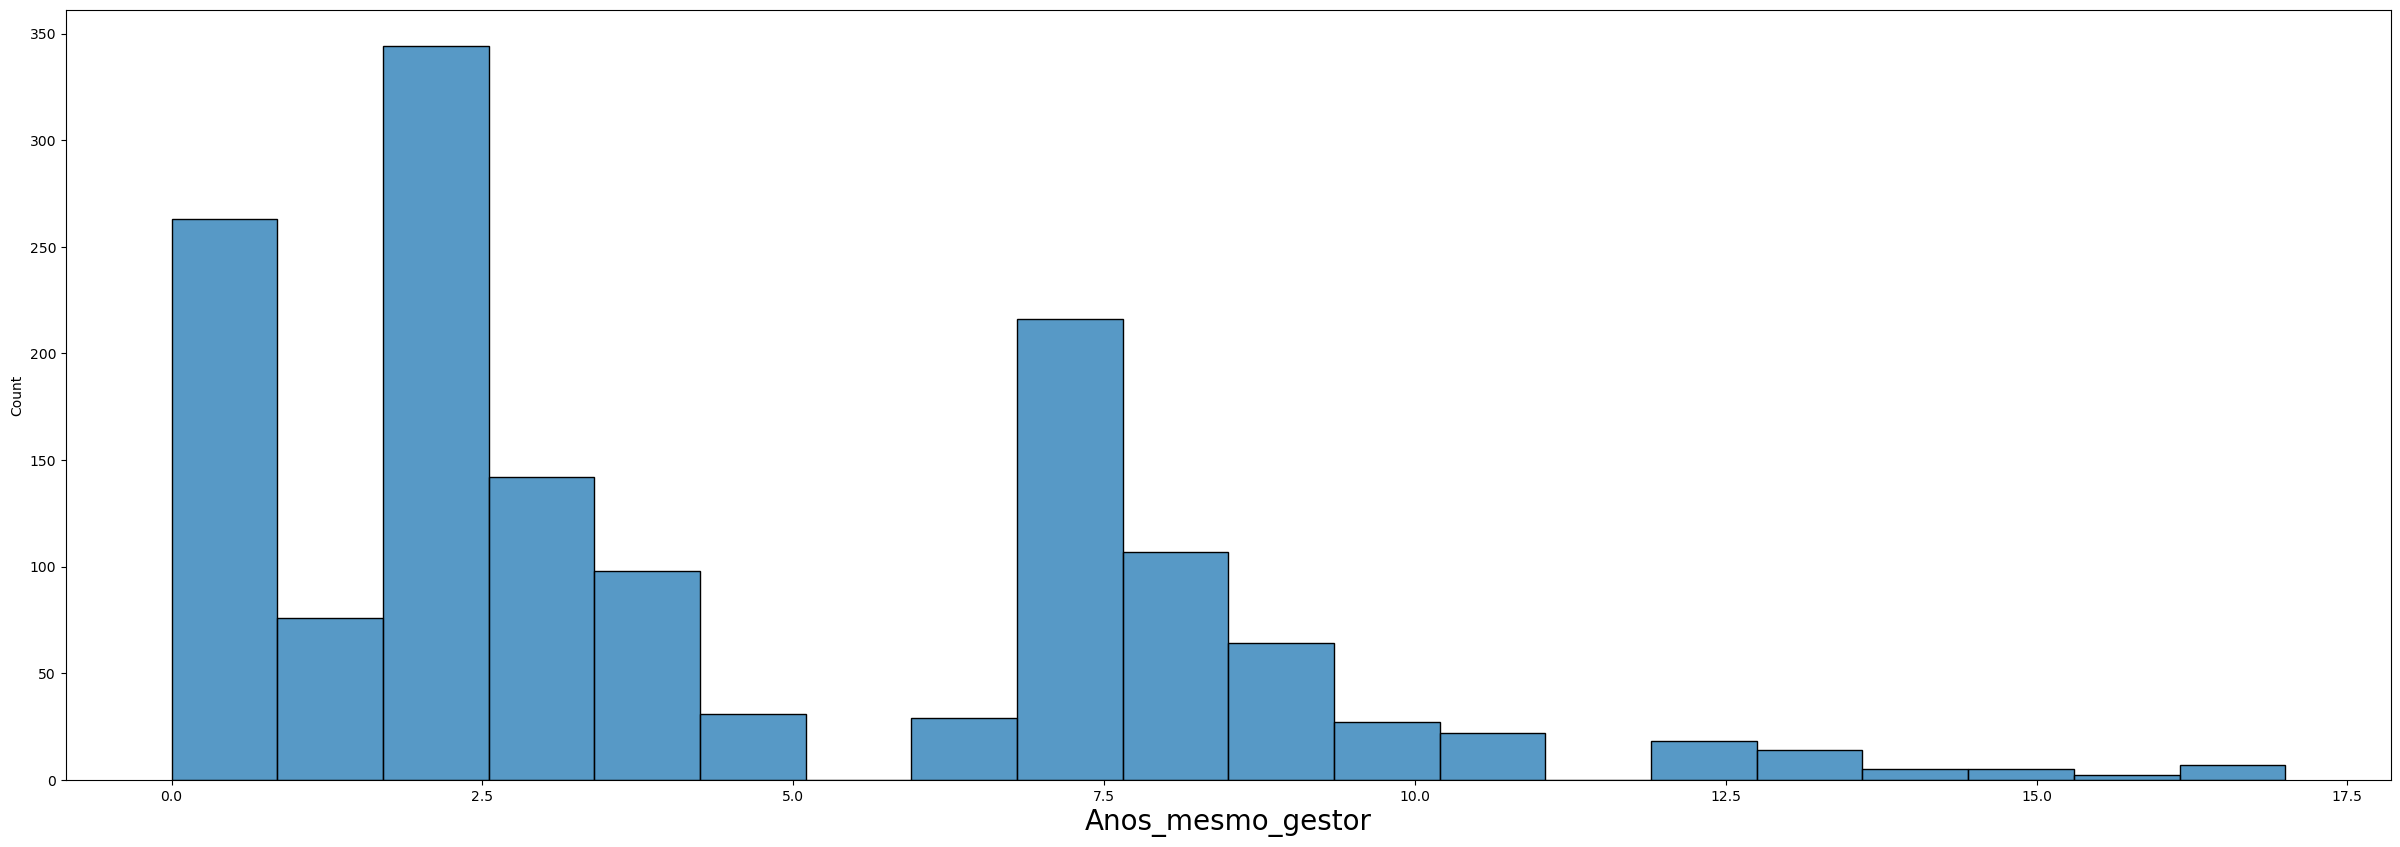

In [9]:
for i in col_num:
    plt.figure(figsize=(30,10))
    plt.xlabel(i, fontsize = 20)
    sns.histplot(data=df, x=i), '\n'

In [10]:
df = df.to_csv('Dados_tratados.csv', index=False)
df